In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split,GridSearchCV

In [2]:
data=pd.read_csv('large-scale+wave+energy+farm.csv')

In [3]:
df=pd.DataFrame(data)

In [4]:
df.head()

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,Power42,Power43,Power44,Power45,Power46,Power47,Power48,Power49,qW,Total_Power
0,600.0,0.0,546.16,37.50,489.79,74.88,432.47,112.05,650.0,0.0,...,88867.92,98844.30,101283.59,98934.63,101624.58,100915.03,99625.68,96704.34,0.87,4102461.43
1,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,88896.55,98759.79,101346.07,98873.59,101629.01,100934.53,99606.13,96718.39,0.87,4103361.41
2,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,88919.83,98746.68,101346.15,98875.57,101618.32,100941.00,99611.35,96719.14,0.87,4103680.44
3,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,88855.14,98760.96,101338.59,98971.58,101632.28,100943.59,99589.25,96735.04,0.87,4105661.06
4,200.0,0.0,146.17,37.53,89.76,74.93,32.40,112.18,400.0,0.0,...,88005.30,98630.24,100432.73,98803.01,101064.48,100948.38,99028.87,96286.71,0.79,3752648.77


In [5]:
df.tail()

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,Power42,Power43,Power44,Power45,Power46,Power47,Power48,Power49,qW,Total_Power
36038,100.0,250.0,250.0,250.0,300.0,200.0,400.0,100.0,900.0,150.0,...,100382.68,90042.10,99539.28,100219.37,70180.74,98693.05,100739.06,100530.96,0.86,4048188.53
36039,250.0,200.0,500.0,150.0,350.0,200.0,700.0,500.0,50.0,250.0,...,97576.89,89874.39,99413.89,83966.40,74140.17,66977.16,99768.78,92788.85,0.85,4033017.16
36040,200.0,100.0,400.0,100.0,350.0,500.0,750.0,200.0,700.0,250.0,...,101072.75,98181.96,77322.16,77632.27,102878.91,83002.93,91852.61,98283.28,0.86,4048053.62
36041,500.0,250.0,350.0,350.0,1000.0,250.0,550.0,150.0,800.0,0.0,...,99078.22,101120.28,73597.78,102042.99,58438.65,98804.39,66383.44,97423.85,0.86,4062515.64
36042,100.0,400.0,400.0,700.0,400.0,200.0,800.0,50.0,350.0,250.0,...,101467.79,97602.18,63219.97,90117.87,73152.07,99875.52,101412.65,76111.53,0.86,4057544.99


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36043 entries, 0 to 36042
Columns: 149 entries, X1 to Total_Power
dtypes: float64(149)
memory usage: 41.0 MB


In [7]:
df.describe()

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,Power42,Power43,Power44,Power45,Power46,Power47,Power48,Power49,qW,Total_Power
count,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,...,36043.000000,36043.00000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,3.604300e+04
mean,366.597060,18.709550,426.314033,51.085762,477.295590,57.846020,497.150488,73.323178,684.309548,44.012247,...,93678.772248,96530.68484,96666.293181,97007.214249,98466.265281,98106.278501,97462.663041,96134.920454,0.833849,3.938246e+06
std,307.911246,44.043295,265.781316,90.151852,270.322011,42.143917,279.631344,51.140816,237.862684,59.242702,...,7401.226140,6709.53446,7020.690028,4829.877255,4978.194259,4263.508074,3134.420742,3889.098339,0.026052,1.226171e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,52516.130000,56391.97000,53877.360000,53050.330000,55401.380000,63028.260000,61717.310000,47257.430000,0.720000,3.388944e+06
25%,65.770000,0.000000,200.000000,0.000000,289.950000,50.000000,300.000000,50.000000,600.000000,0.000000,...,88177.210000,94648.08000,96932.520000,97612.350000,97629.940000,97154.630000,96869.740000,96319.550000,0.810000,3.847335e+06
50%,250.000000,0.000000,346.090000,37.520000,400.000000,74.820000,500.000000,100.000000,700.000000,0.080000,...,93694.540000,98729.91000,99269.310000,98857.150000,100423.930000,99805.920000,98710.730000,96543.090000,0.830000,3.931541e+06
75%,600.000000,0.000000,745.980000,37.900000,689.800000,74.960000,632.750000,112.150000,850.000000,50.000000,...,100997.520000,100622.52000,100282.360000,99156.130000,101370.970000,100955.350000,99064.495000,97036.300000,0.860000,4.063623e+06
max,1000.000000,885.590000,1000.000000,939.260000,1000.000000,990.000000,1000.000000,990.000000,1000.000000,919.590000,...,110945.940000,109400.43000,114194.520000,106702.150000,104751.350000,102892.110000,102275.480000,101876.140000,0.880000,4.177659e+06


In [8]:
df.shape

(36043, 149)

In [9]:
df.columns

Index(['X1', 'Y1', 'X2', 'Y2', 'X3', 'Y3', 'X4', 'Y4', 'X5', 'Y5',
       ...
       'Power42', 'Power43', 'Power44', 'Power45', 'Power46', 'Power47',
       'Power48', 'Power49', 'qW', 'Total_Power'],
      dtype='object', length=149)

In [10]:
df.isnull().sum()

X1             0
Y1             0
X2             0
Y2             0
X3             0
              ..
Power47        0
Power48        0
Power49        0
qW             0
Total_Power    0
Length: 149, dtype: int64

In [11]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
36038    False
36039    False
36040    False
36041    False
36042    False
Length: 36043, dtype: bool

In [12]:
df.duplicated().sum()

25107

In [13]:
df.drop_duplicates()

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,Power42,Power43,Power44,Power45,Power46,Power47,Power48,Power49,qW,Total_Power
0,600.0,0.0,546.16,37.50,489.79,74.88,432.47,112.05,650.0,0.0,...,88867.92,98844.30,101283.59,98934.63,101624.58,100915.03,99625.68,96704.34,0.87,4102461.43
1,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,88896.55,98759.79,101346.07,98873.59,101629.01,100934.53,99606.13,96718.39,0.87,4103361.41
2,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,88919.83,98746.68,101346.15,98875.57,101618.32,100941.00,99611.35,96719.14,0.87,4103680.44
3,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,88855.14,98760.96,101338.59,98971.58,101632.28,100943.59,99589.25,96735.04,0.87,4105661.06
4,200.0,0.0,146.17,37.53,89.76,74.93,32.40,112.18,400.0,0.0,...,88005.30,98630.24,100432.73,98803.01,101064.48,100948.38,99028.87,96286.71,0.79,3752648.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36038,100.0,250.0,250.00,250.00,300.00,200.00,400.00,100.00,900.0,150.0,...,100382.68,90042.10,99539.28,100219.37,70180.74,98693.05,100739.06,100530.96,0.86,4048188.53
36039,250.0,200.0,500.00,150.00,350.00,200.00,700.00,500.00,50.0,250.0,...,97576.89,89874.39,99413.89,83966.40,74140.17,66977.16,99768.78,92788.85,0.85,4033017.16
36040,200.0,100.0,400.00,100.00,350.00,500.00,750.00,200.00,700.0,250.0,...,101072.75,98181.96,77322.16,77632.27,102878.91,83002.93,91852.61,98283.28,0.86,4048053.62
36041,500.0,250.0,350.00,350.00,1000.00,250.00,550.00,150.00,800.0,0.0,...,99078.22,101120.28,73597.78,102042.99,58438.65,98804.39,66383.44,97423.85,0.86,4062515.64


In [14]:
num_cols=df.select_dtypes(include=['number'])
num_cols

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,Power42,Power43,Power44,Power45,Power46,Power47,Power48,Power49,qW,Total_Power
0,600.0,0.0,546.16,37.50,489.79,74.88,432.47,112.05,650.0,0.0,...,88867.92,98844.30,101283.59,98934.63,101624.58,100915.03,99625.68,96704.34,0.87,4102461.43
1,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,88896.55,98759.79,101346.07,98873.59,101629.01,100934.53,99606.13,96718.39,0.87,4103361.41
2,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,88919.83,98746.68,101346.15,98875.57,101618.32,100941.00,99611.35,96719.14,0.87,4103680.44
3,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,88855.14,98760.96,101338.59,98971.58,101632.28,100943.59,99589.25,96735.04,0.87,4105661.06
4,200.0,0.0,146.17,37.53,89.76,74.93,32.40,112.18,400.0,0.0,...,88005.30,98630.24,100432.73,98803.01,101064.48,100948.38,99028.87,96286.71,0.79,3752648.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36038,100.0,250.0,250.00,250.00,300.00,200.00,400.00,100.00,900.0,150.0,...,100382.68,90042.10,99539.28,100219.37,70180.74,98693.05,100739.06,100530.96,0.86,4048188.53
36039,250.0,200.0,500.00,150.00,350.00,200.00,700.00,500.00,50.0,250.0,...,97576.89,89874.39,99413.89,83966.40,74140.17,66977.16,99768.78,92788.85,0.85,4033017.16
36040,200.0,100.0,400.00,100.00,350.00,500.00,750.00,200.00,700.0,250.0,...,101072.75,98181.96,77322.16,77632.27,102878.91,83002.93,91852.61,98283.28,0.86,4048053.62
36041,500.0,250.0,350.00,350.00,1000.00,250.00,550.00,150.00,800.0,0.0,...,99078.22,101120.28,73597.78,102042.99,58438.65,98804.39,66383.44,97423.85,0.86,4062515.64


C:\Users\anand\AppData\Local\Temp\ipykernel_19196\3827522393.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8,6))


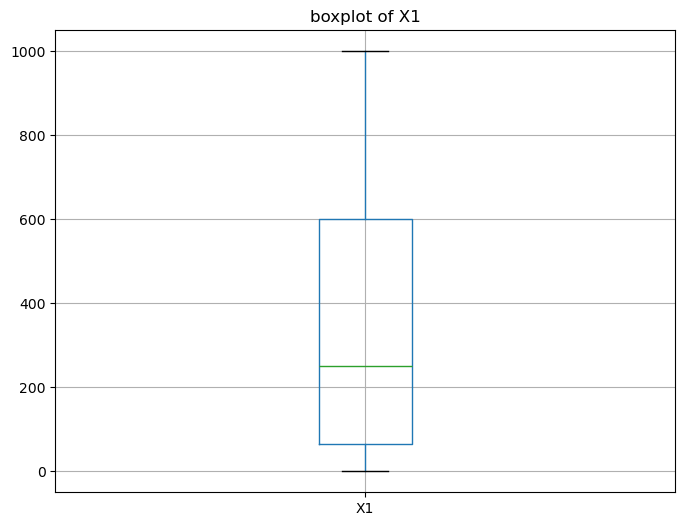

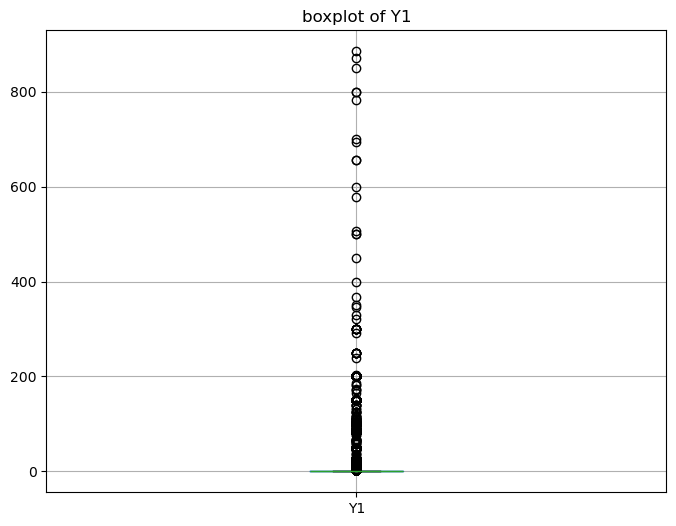

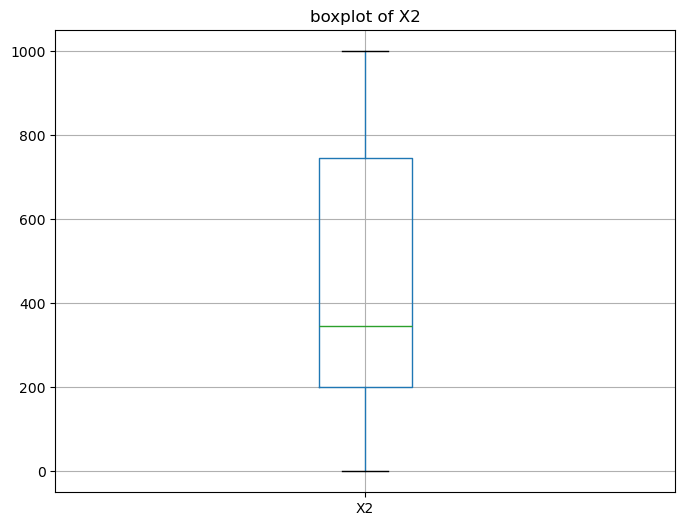

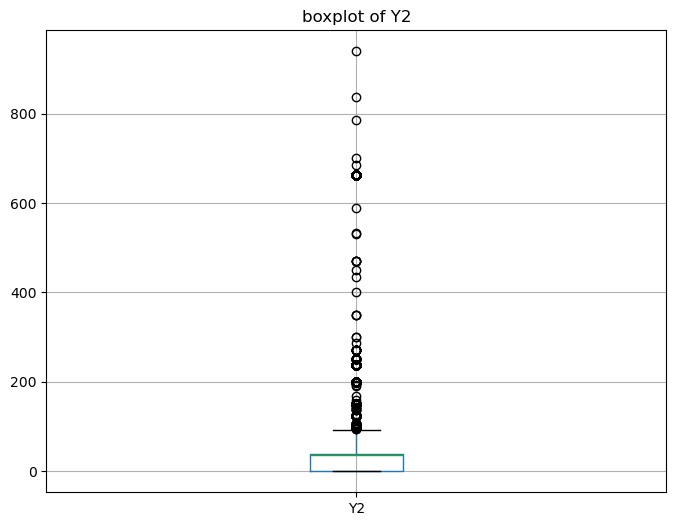

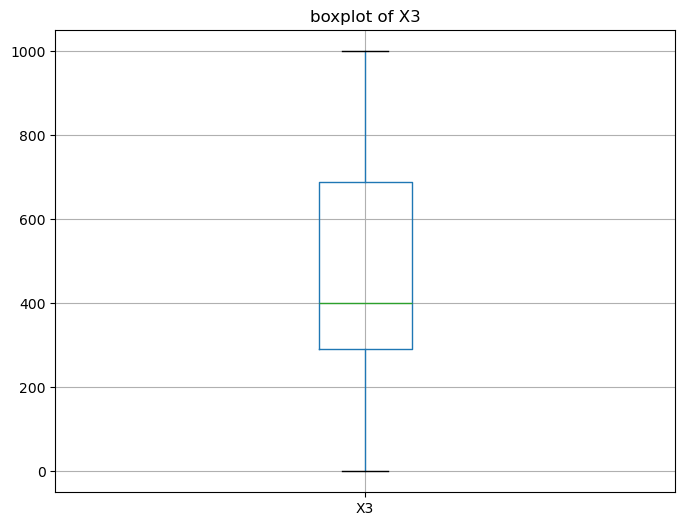

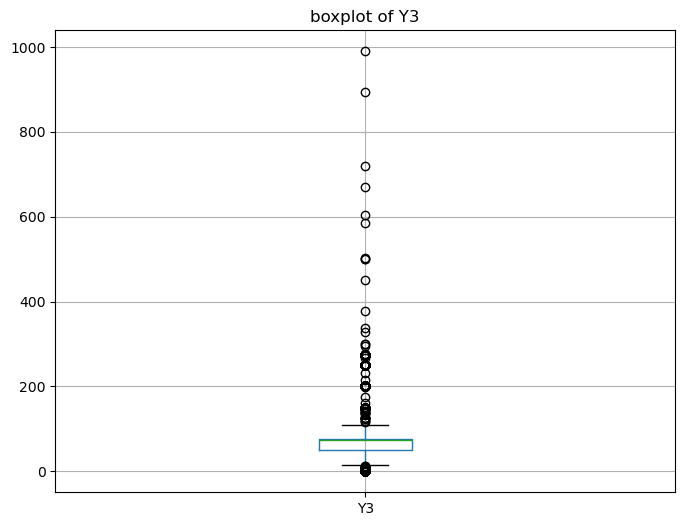

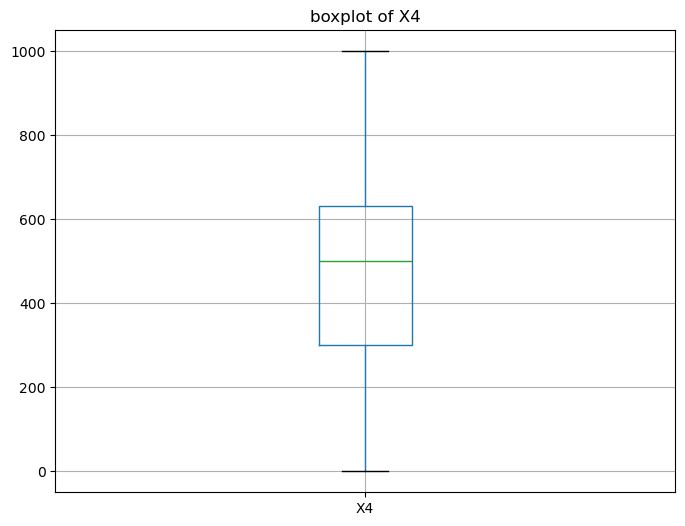

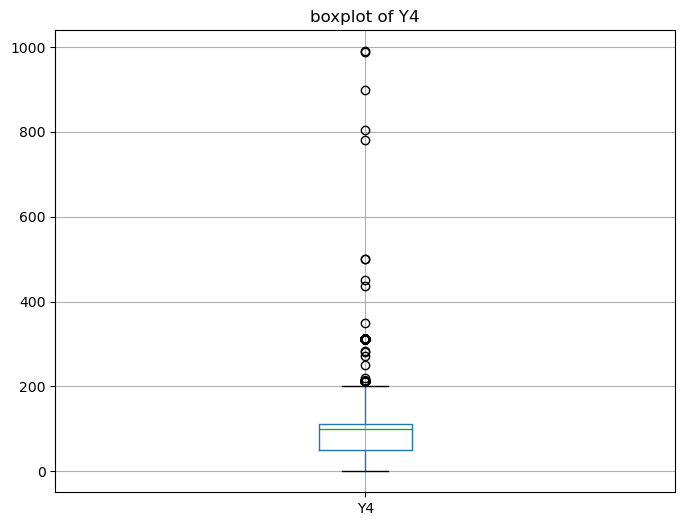

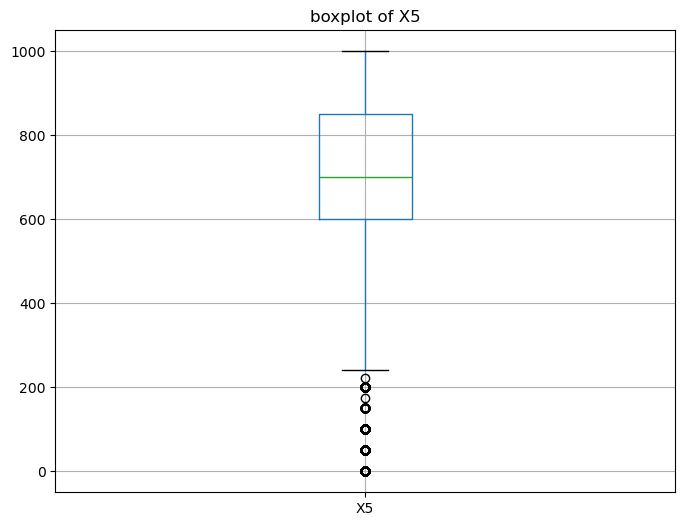

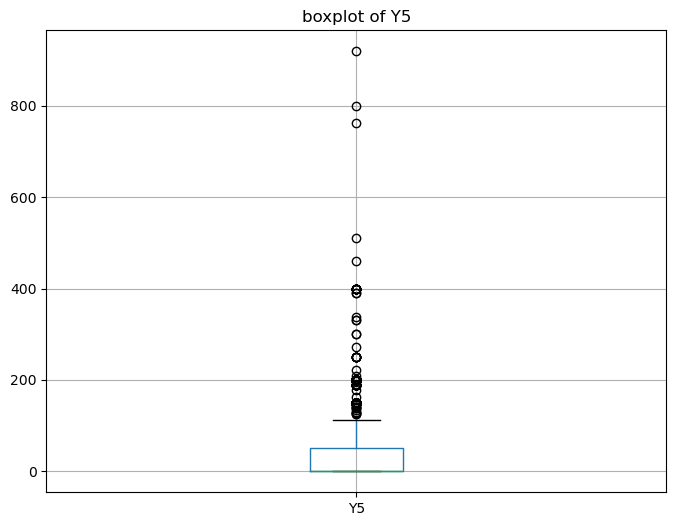

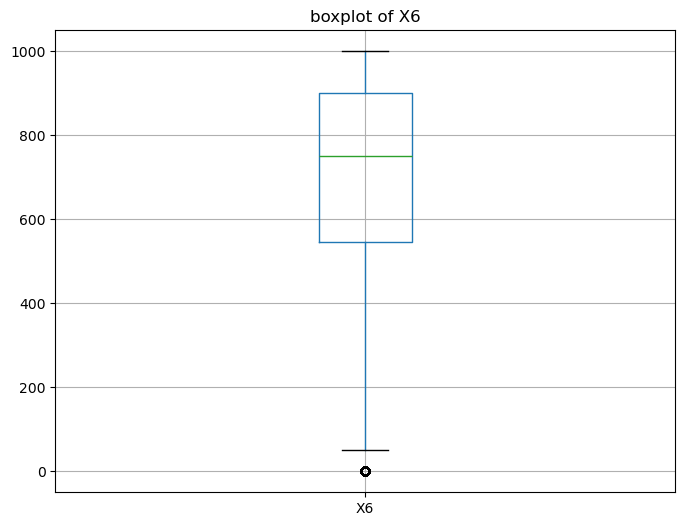

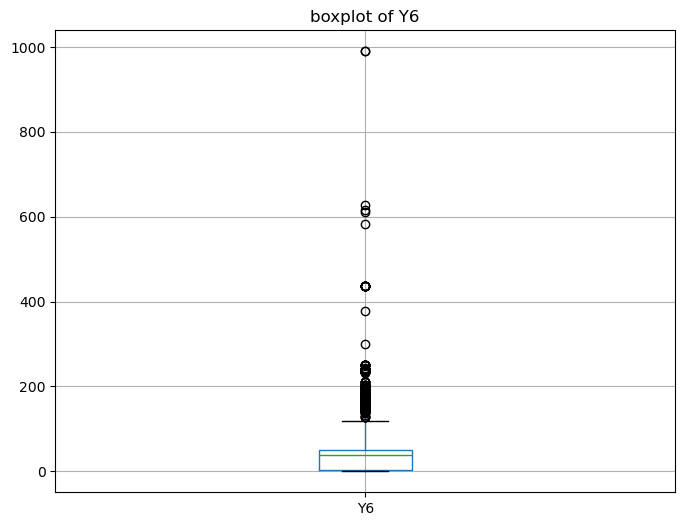

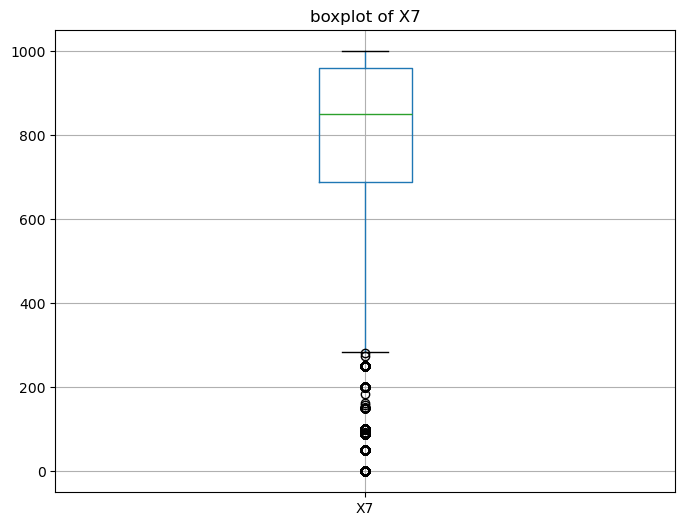

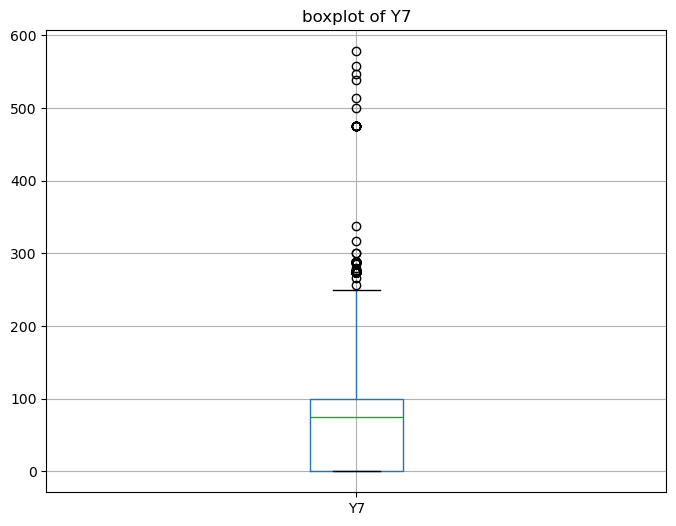

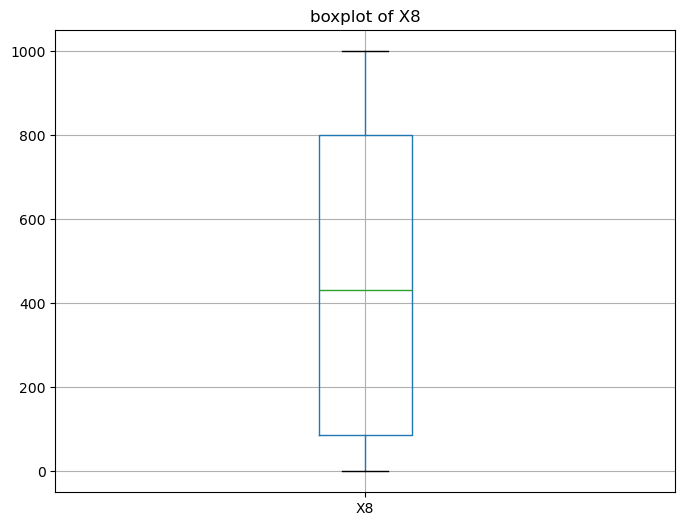

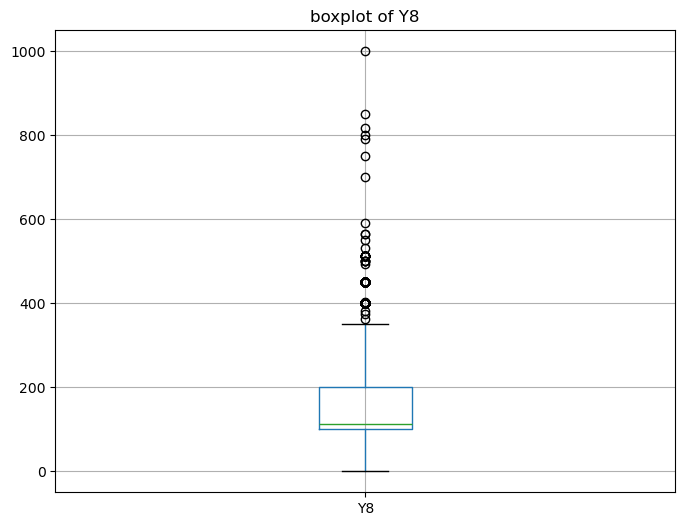

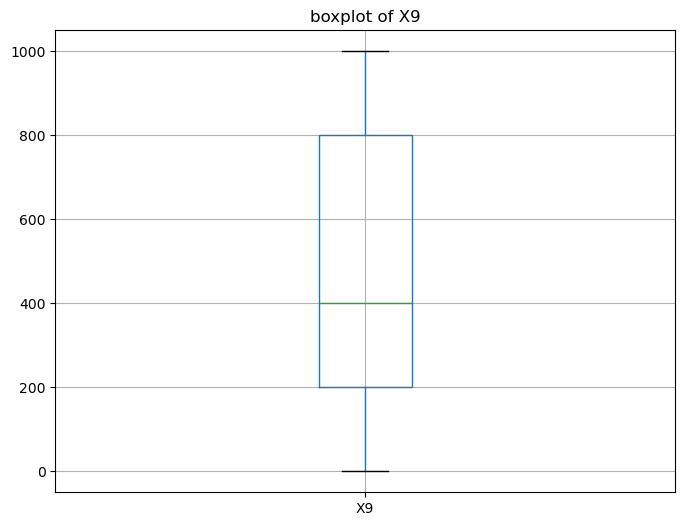

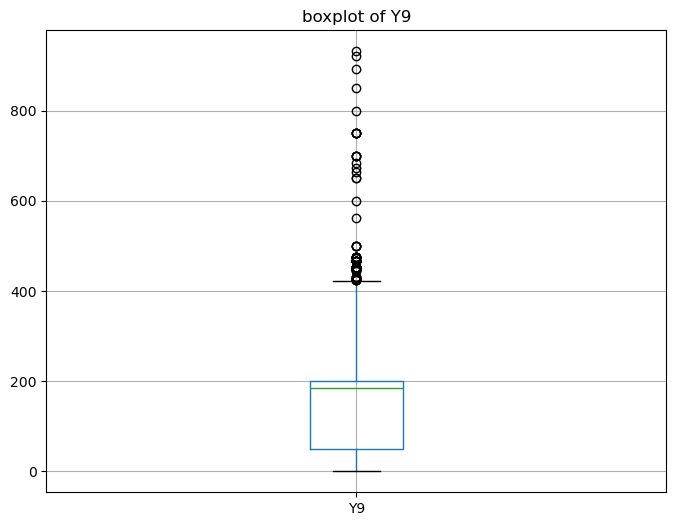

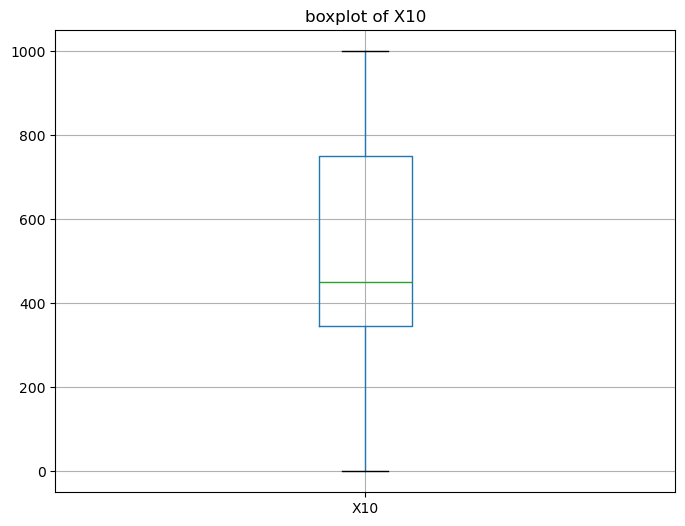

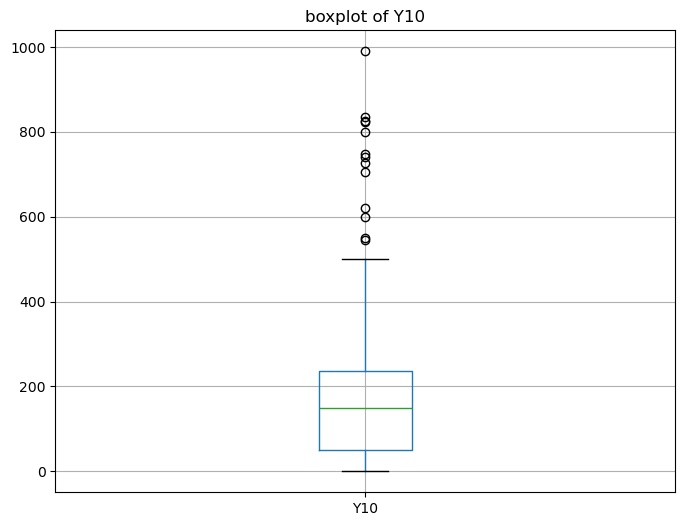

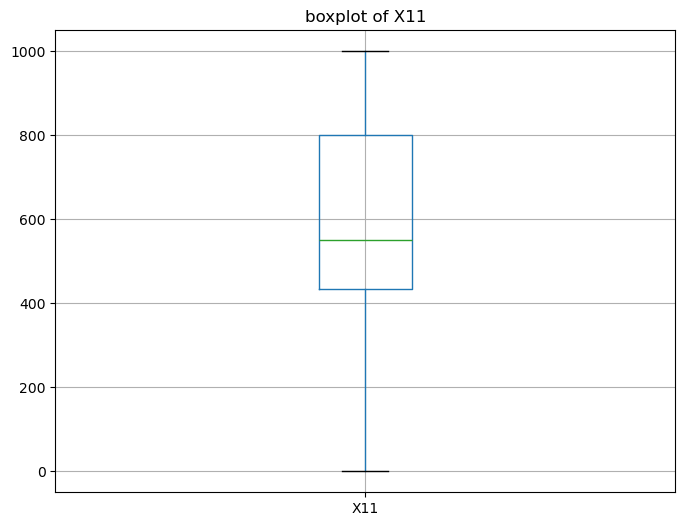

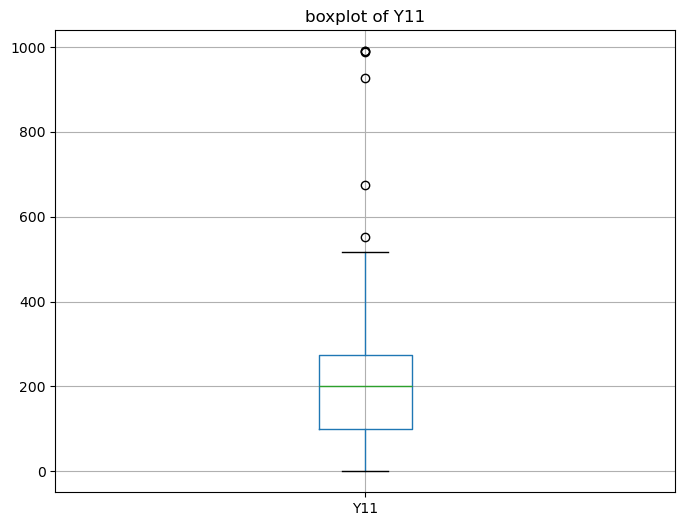

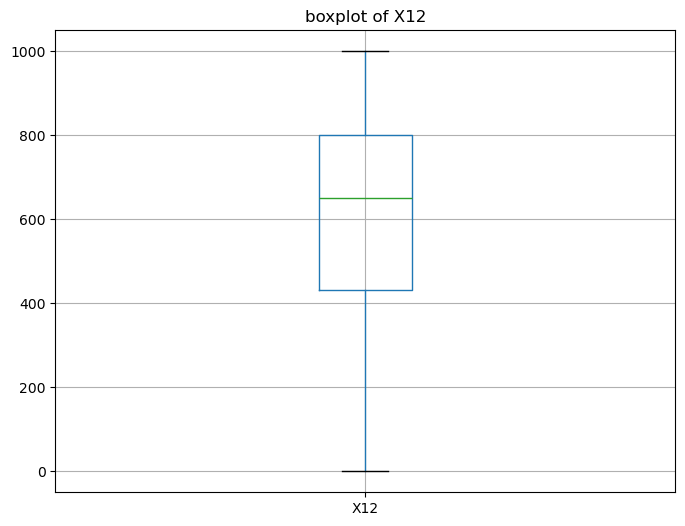

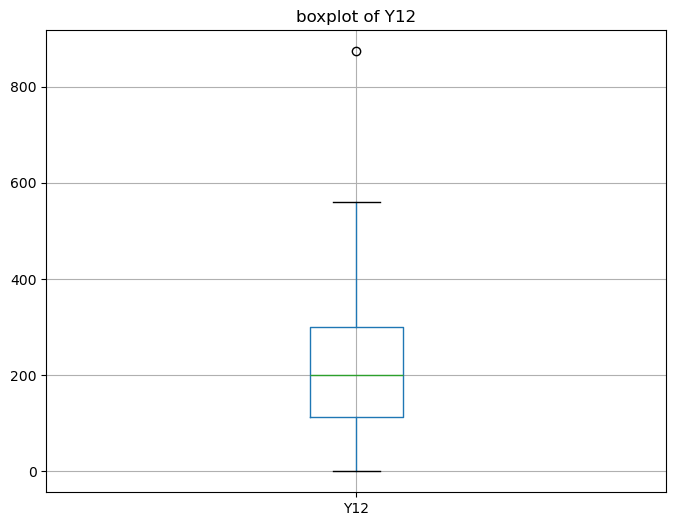

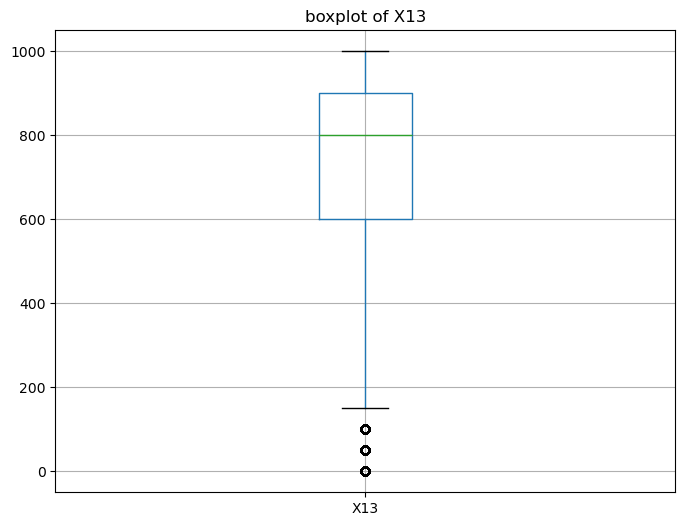

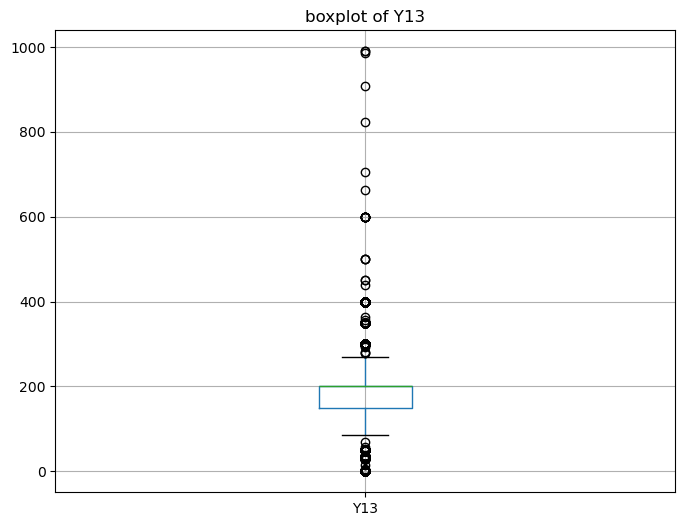

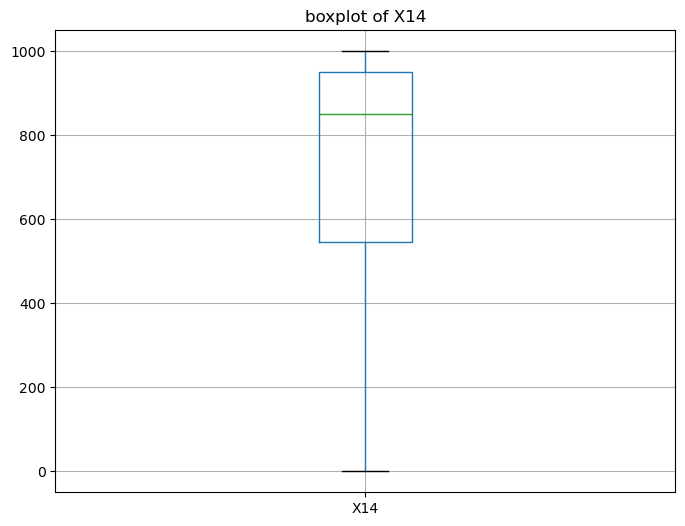

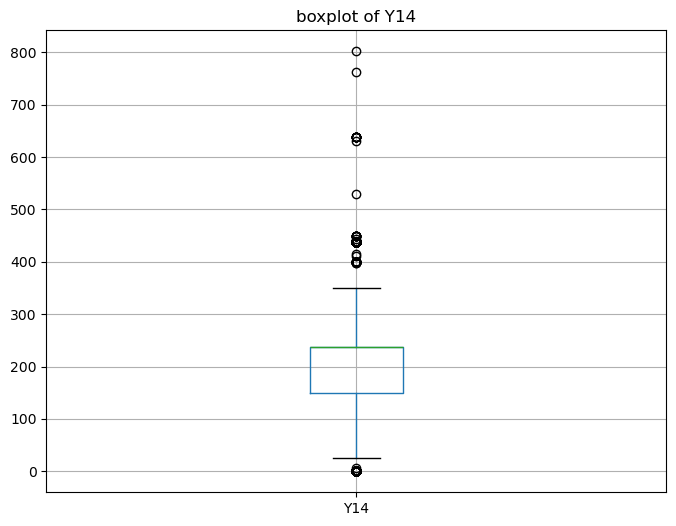

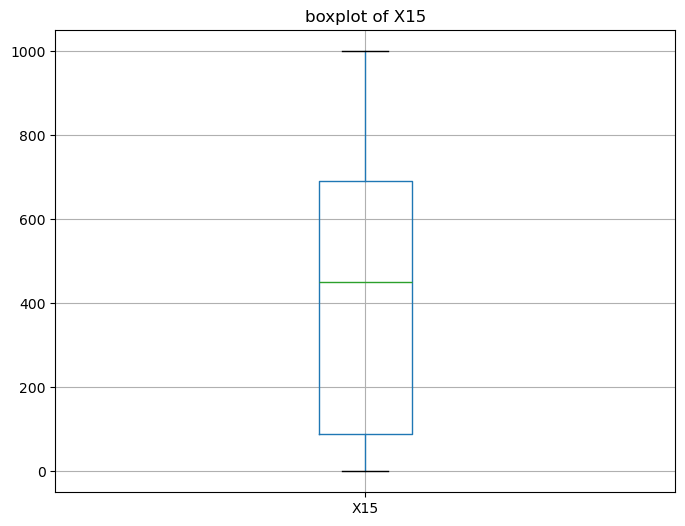

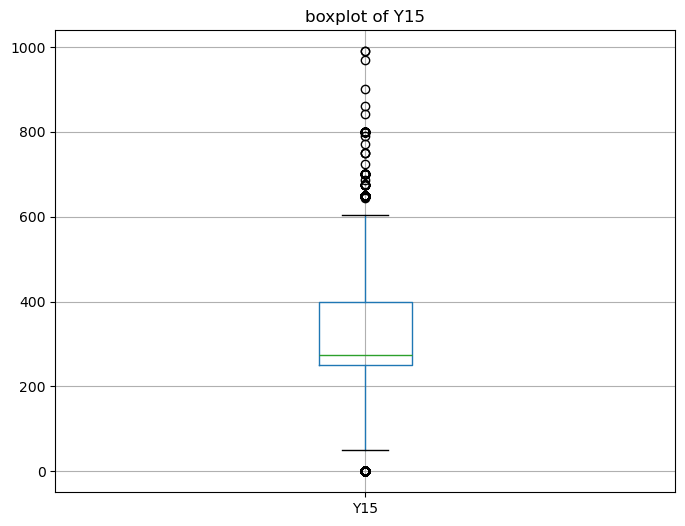

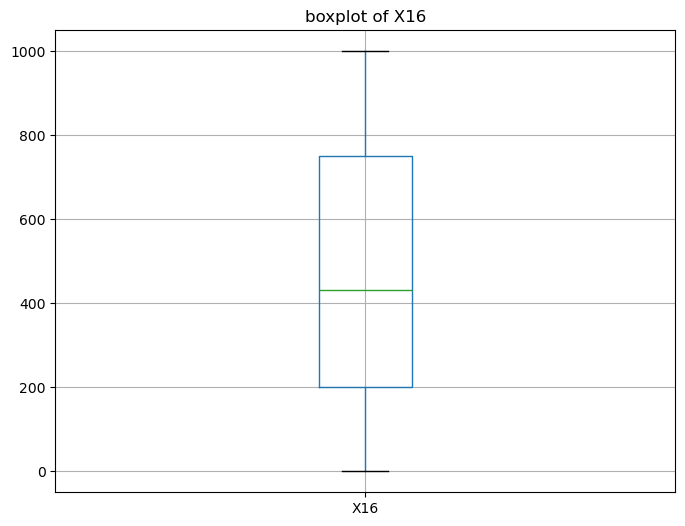

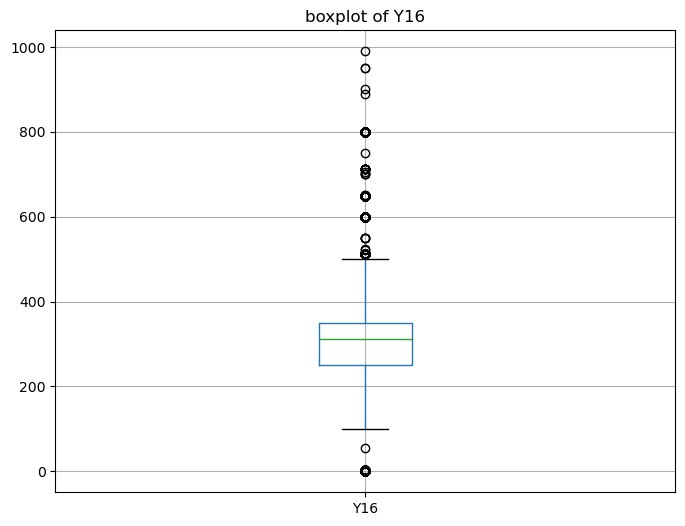

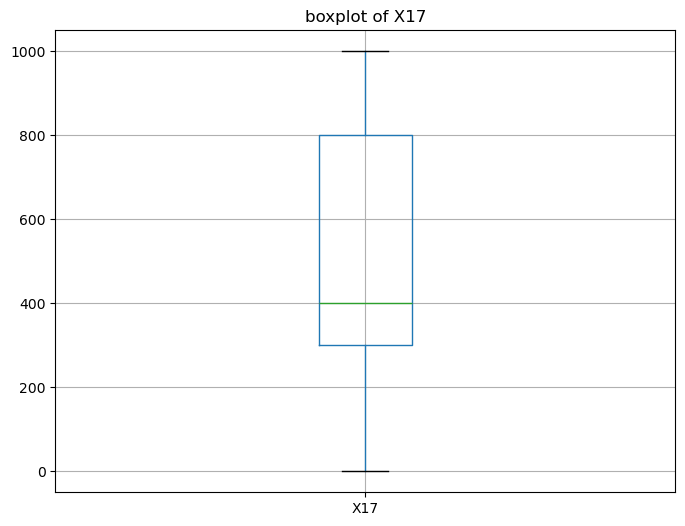

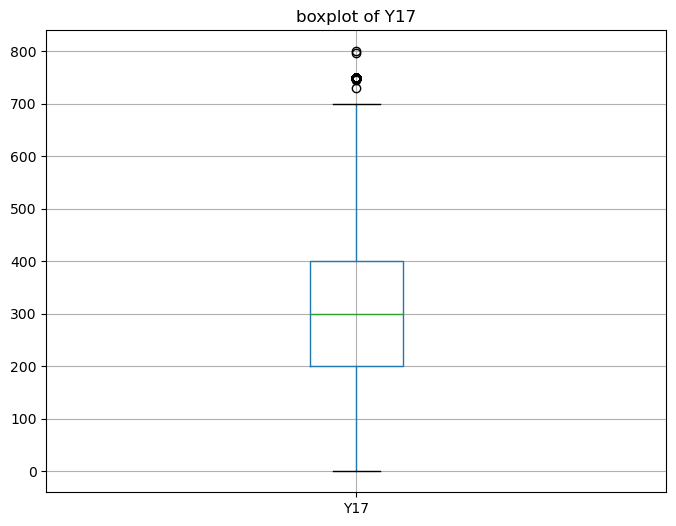

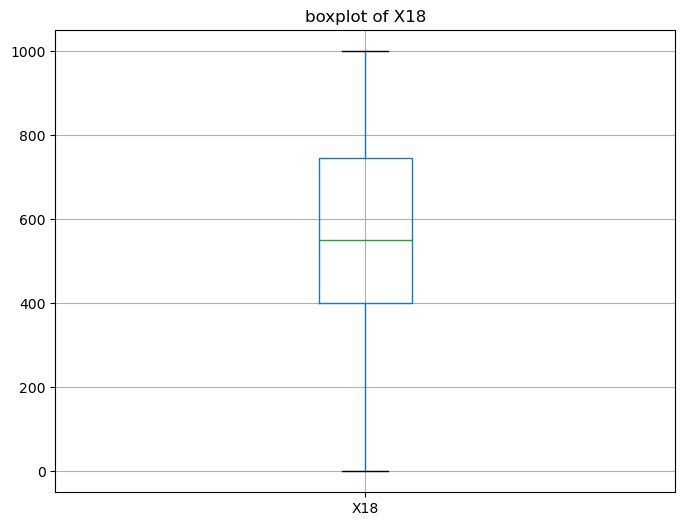

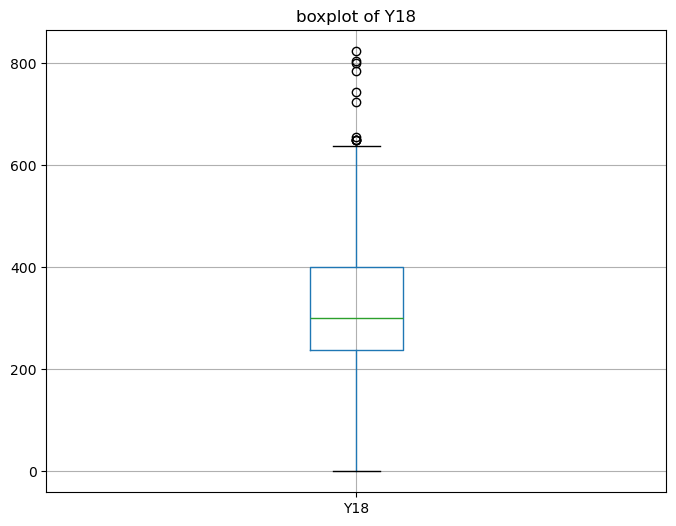

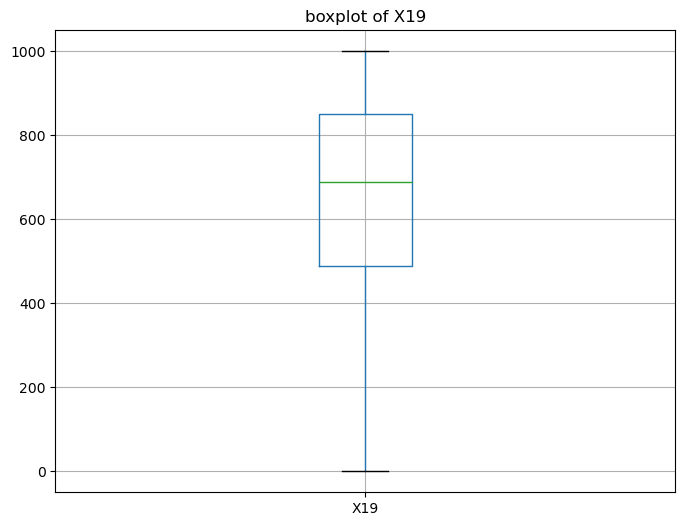

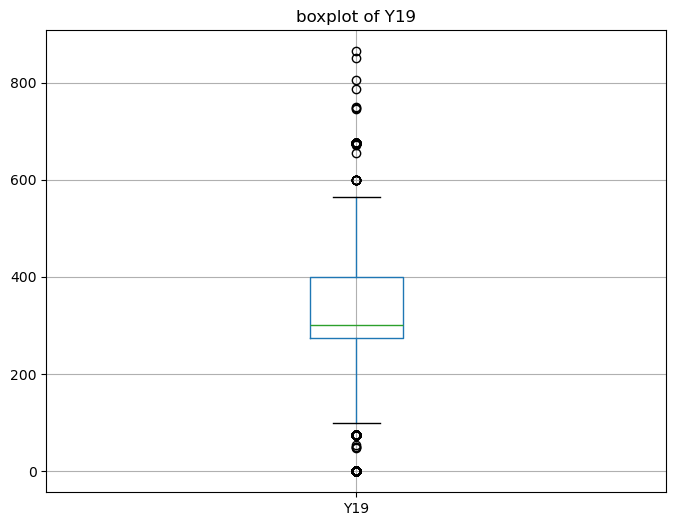

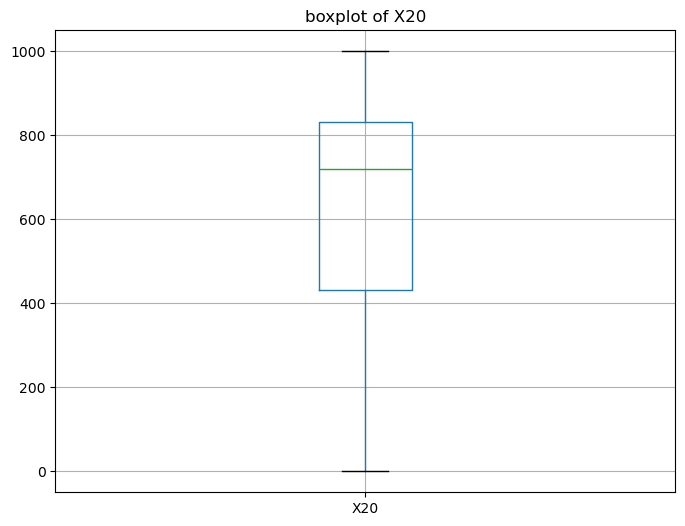

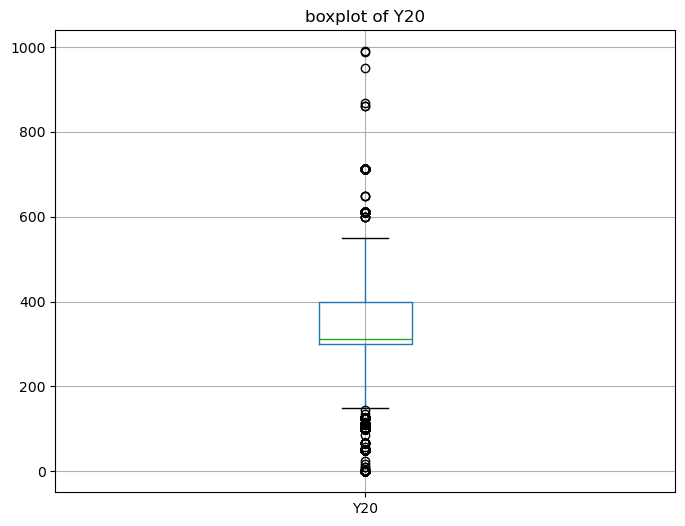

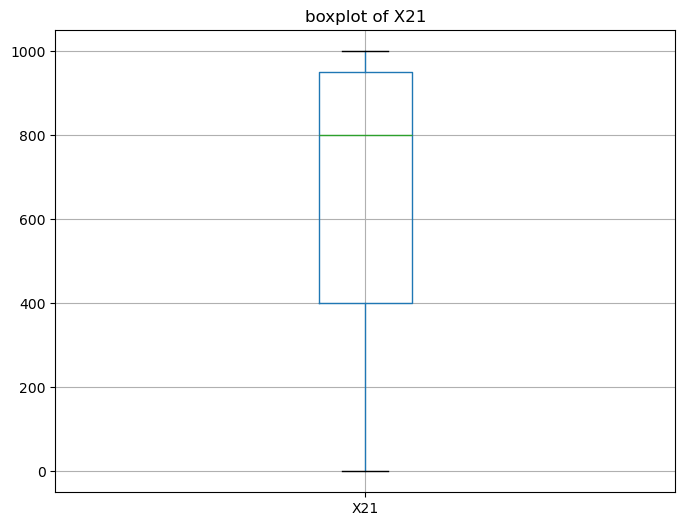

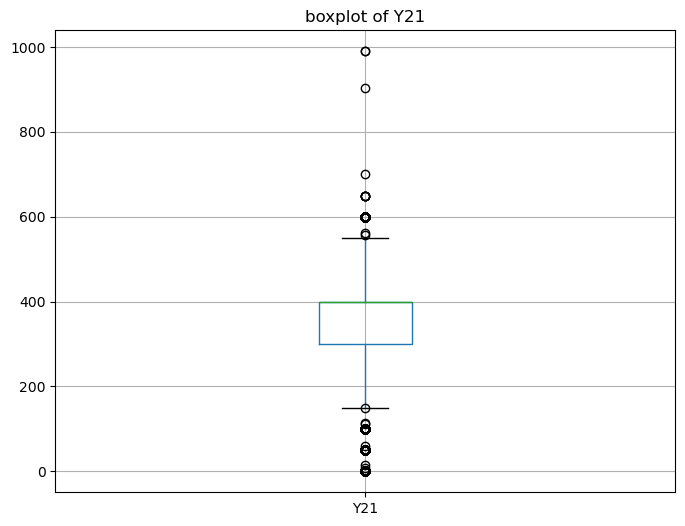

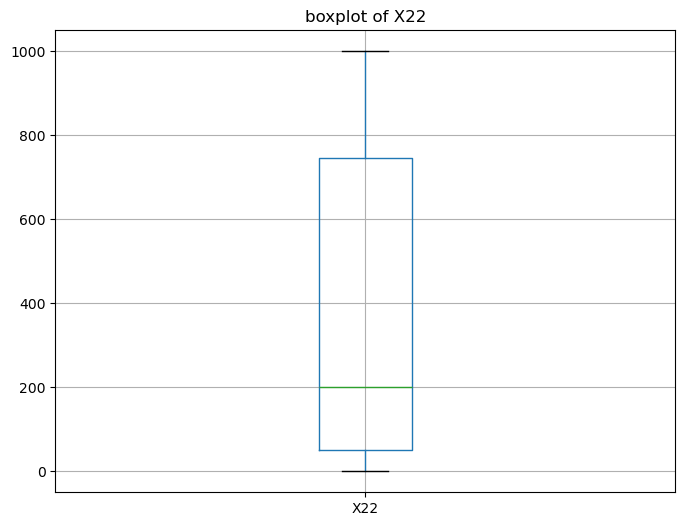

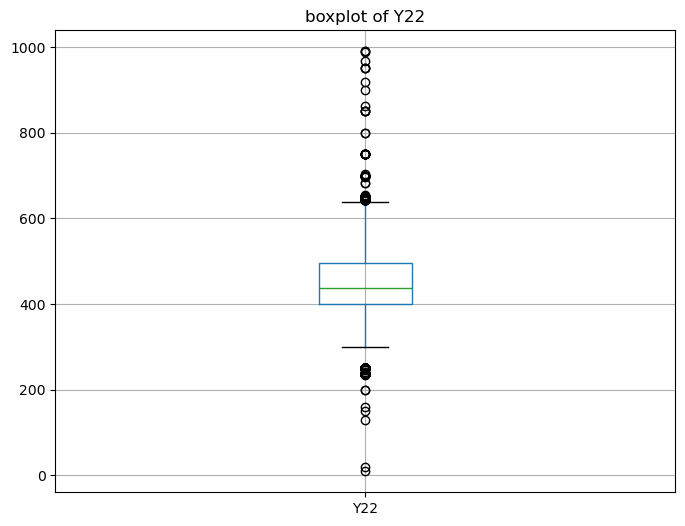

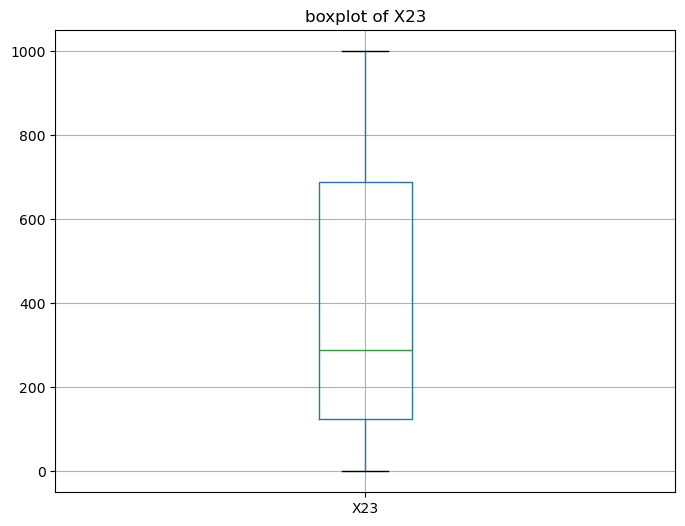

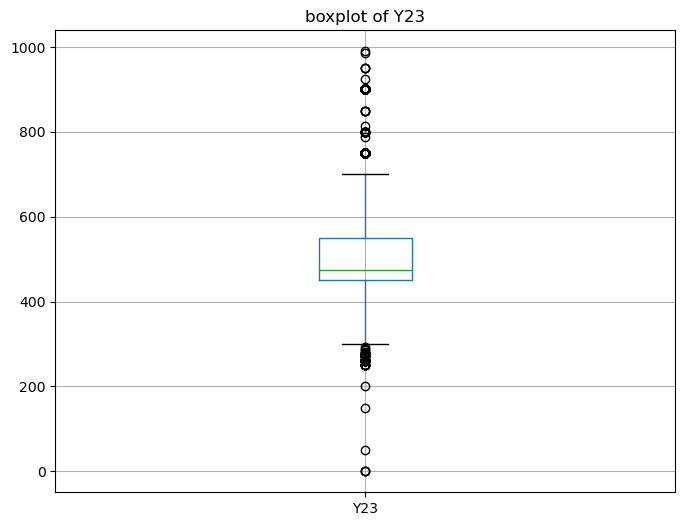

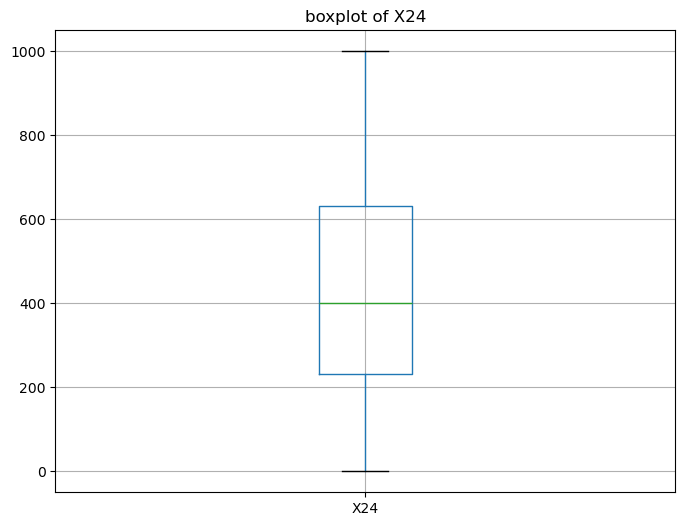

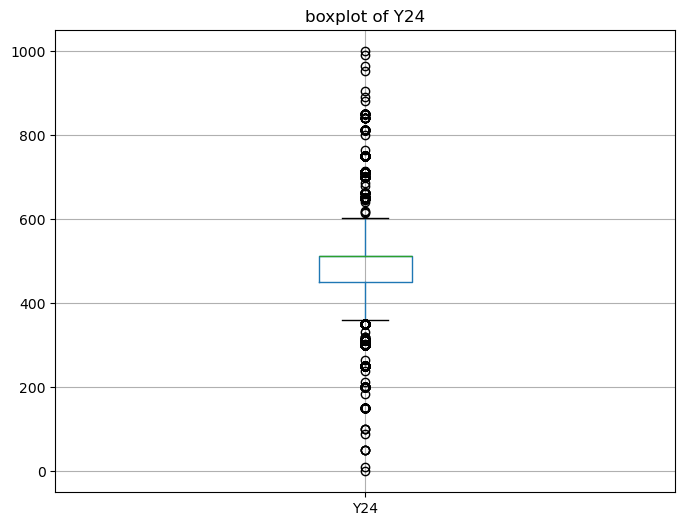

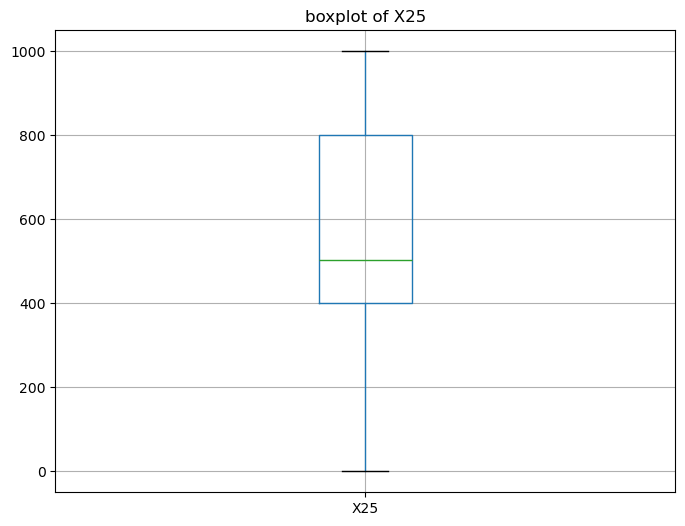

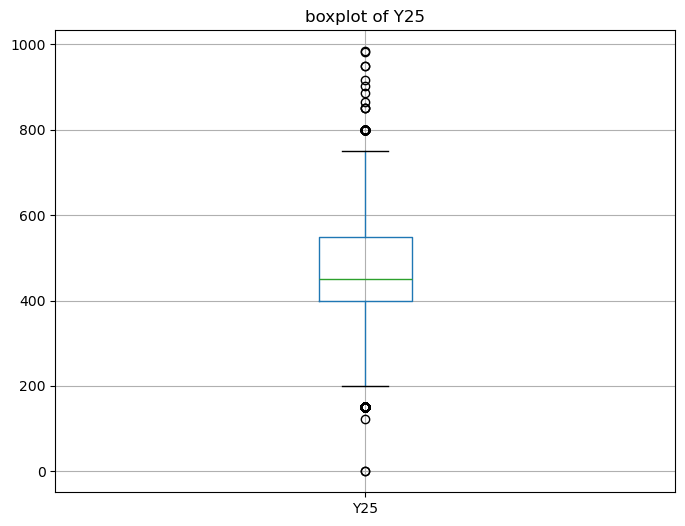

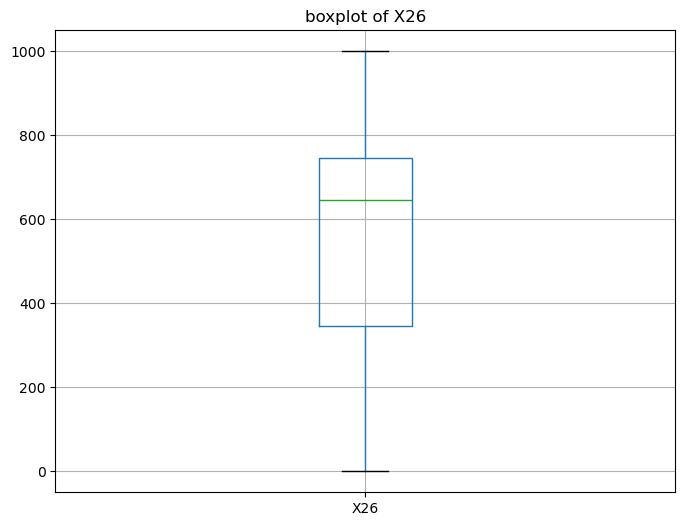

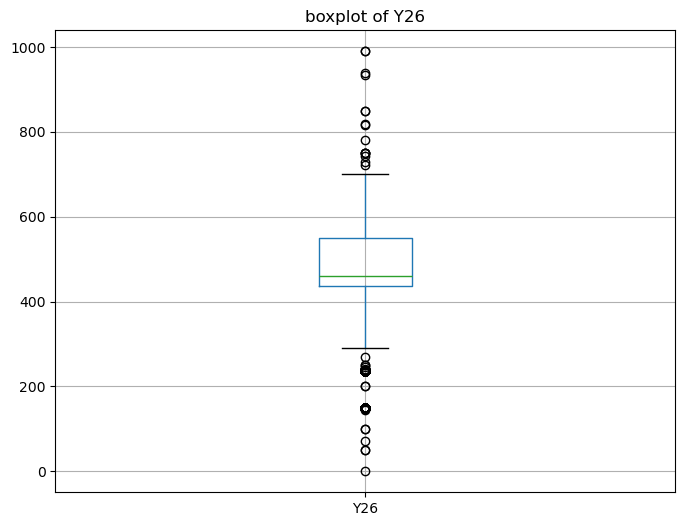

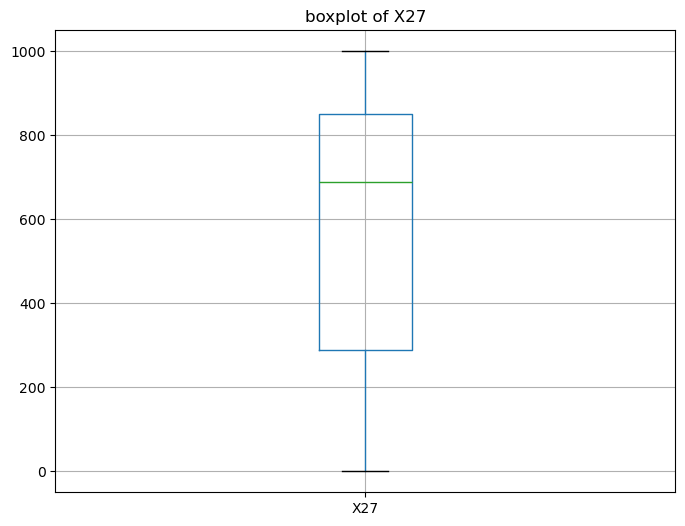

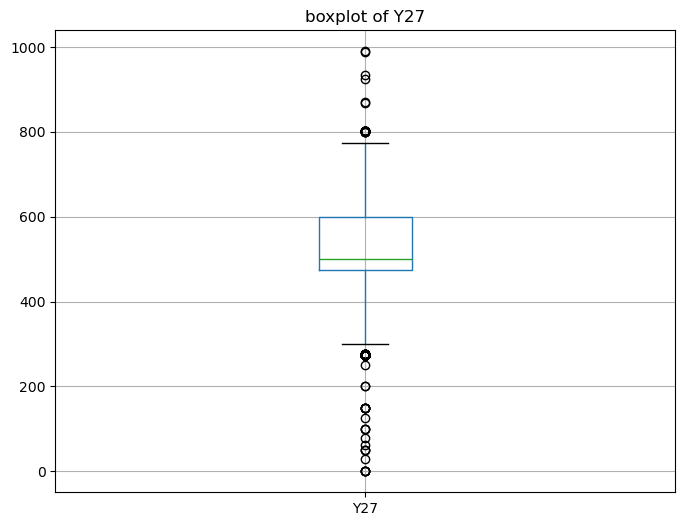

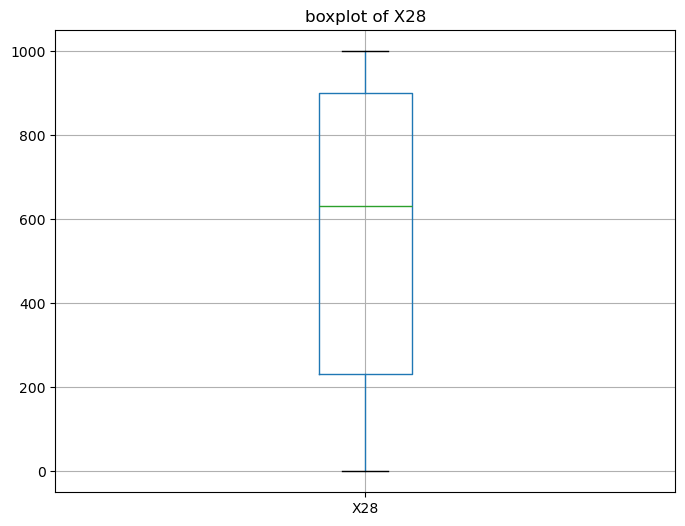

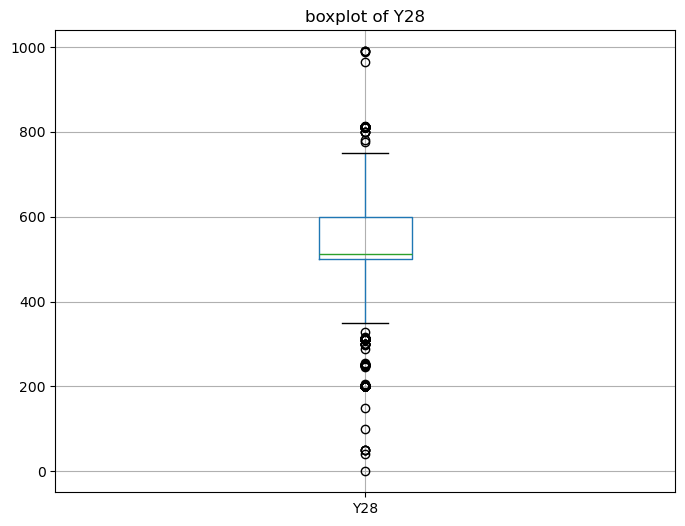

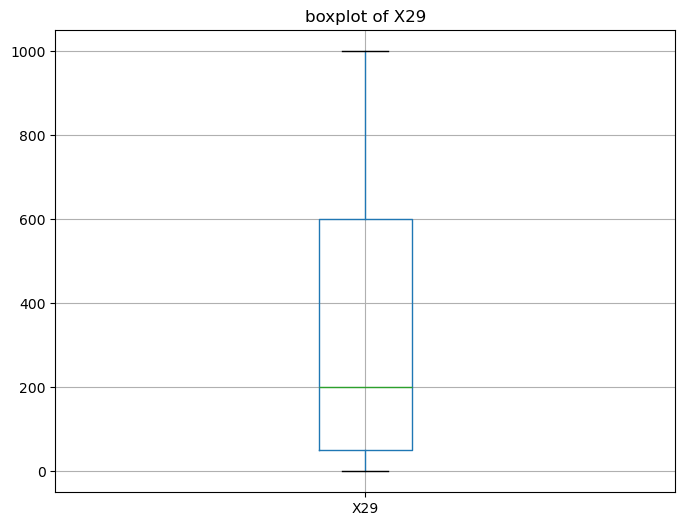

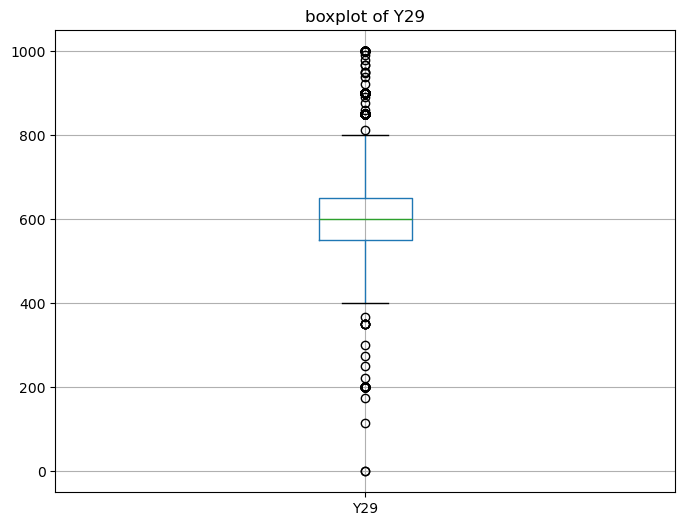

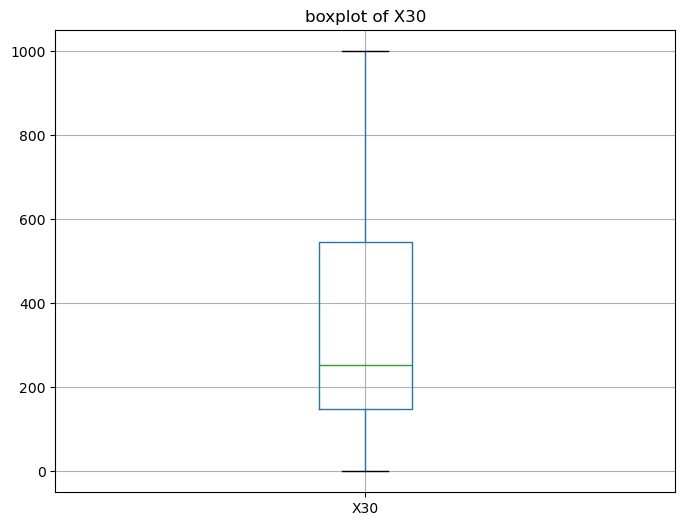

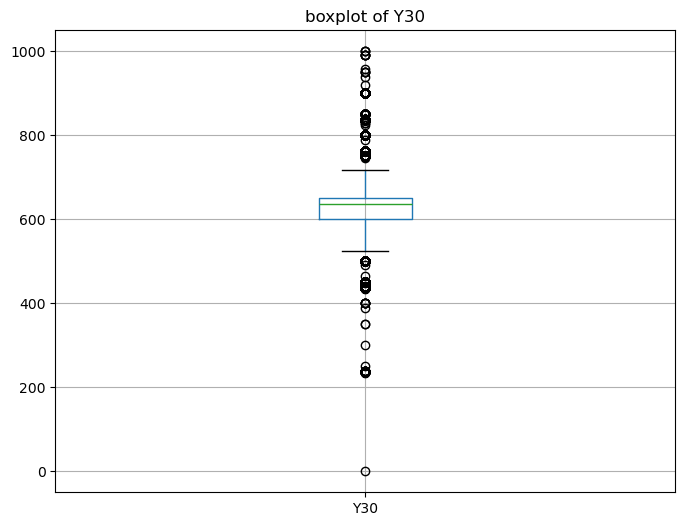

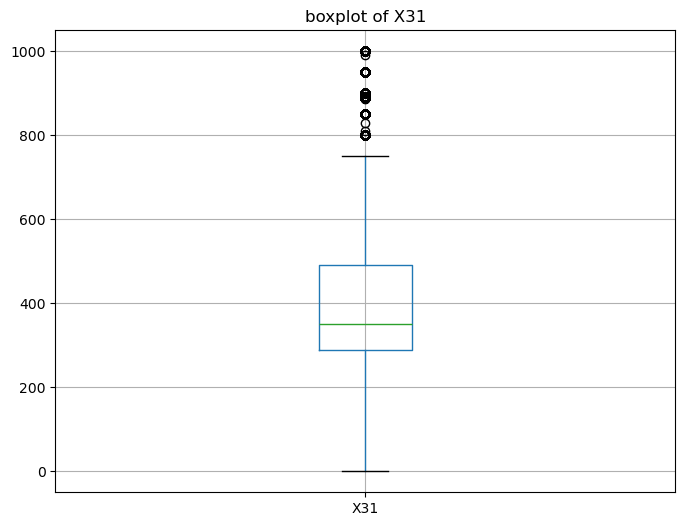

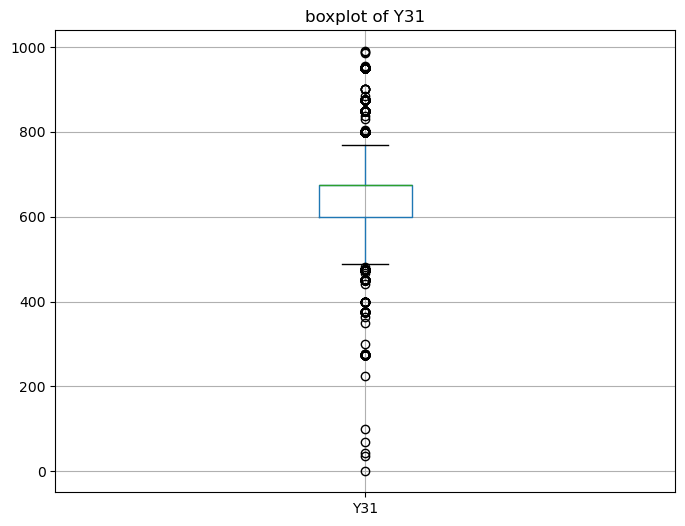

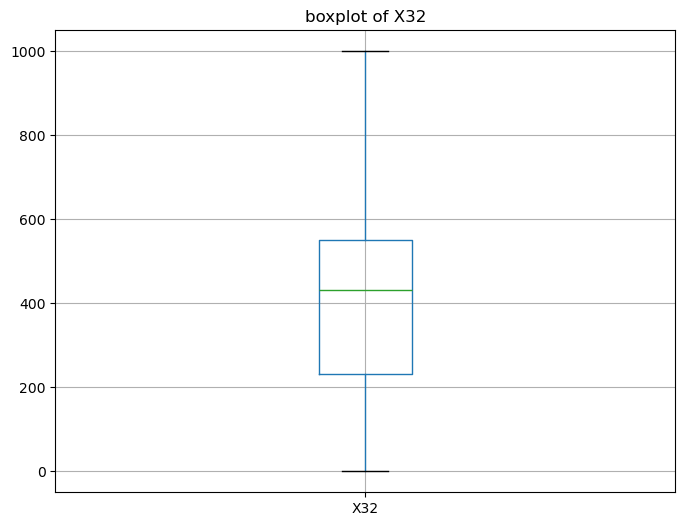

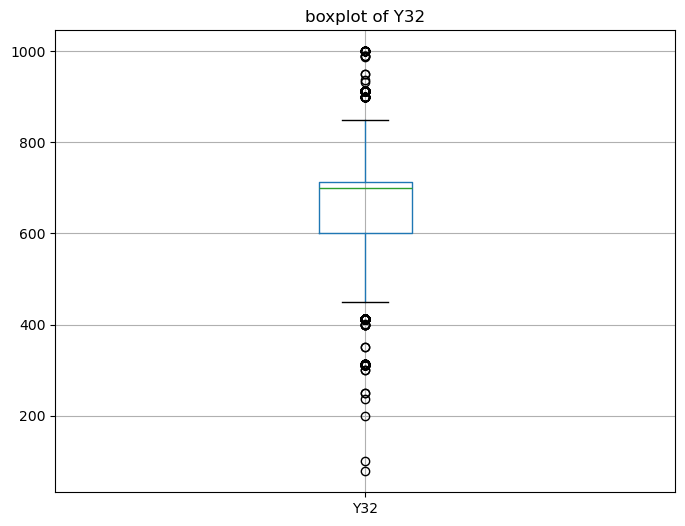

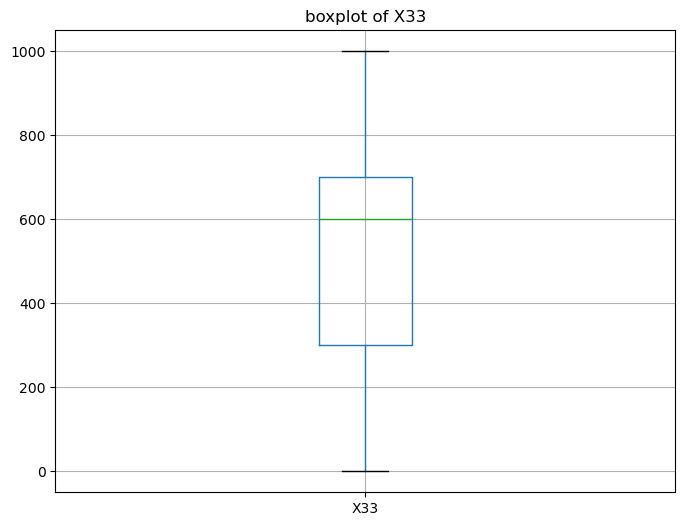

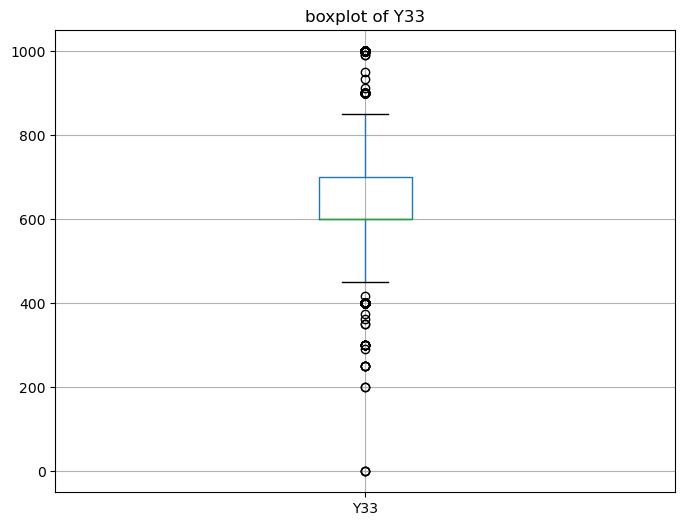

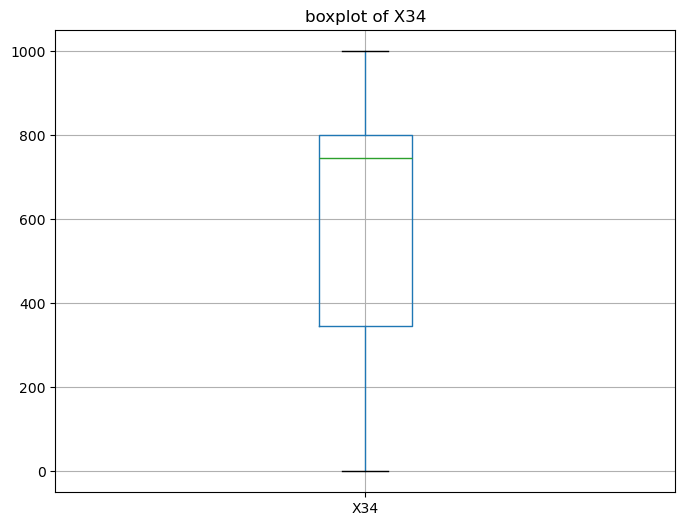

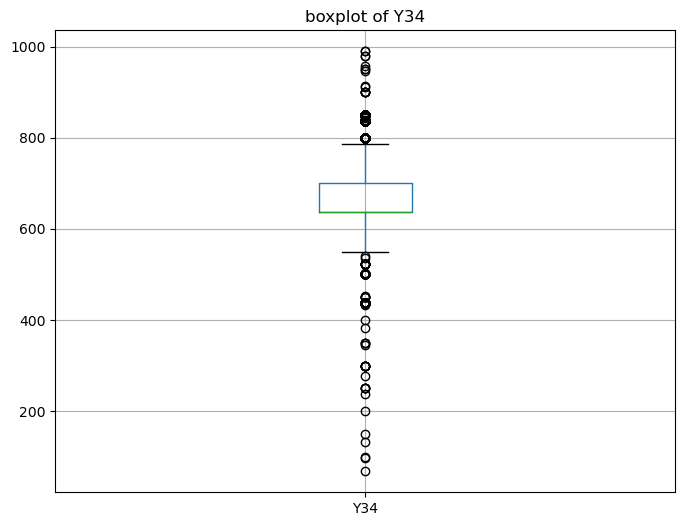

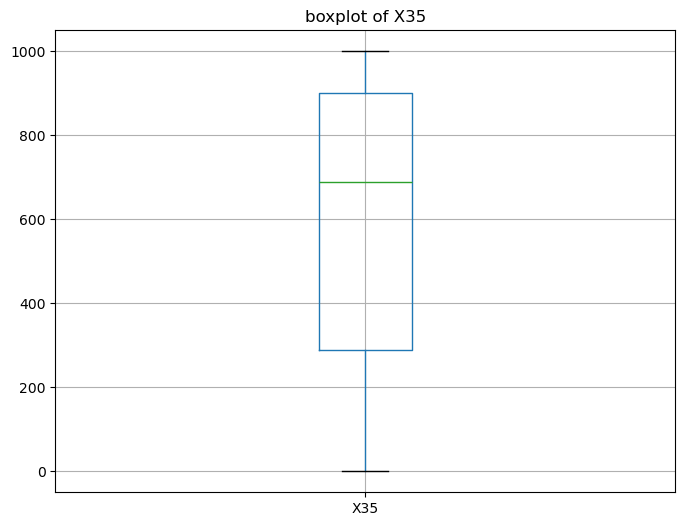

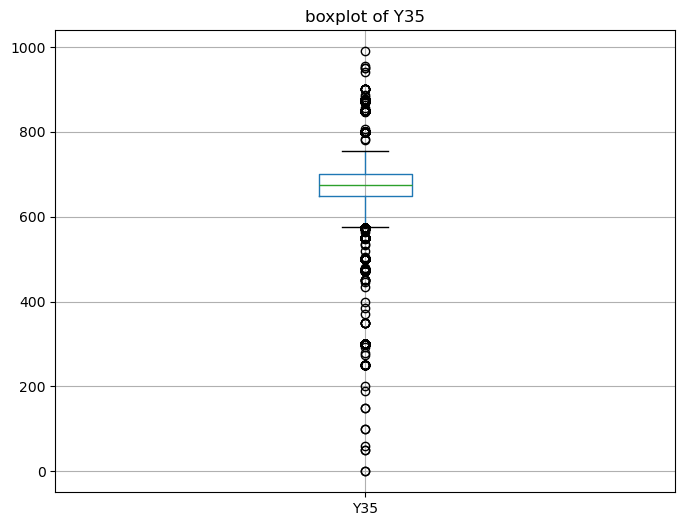

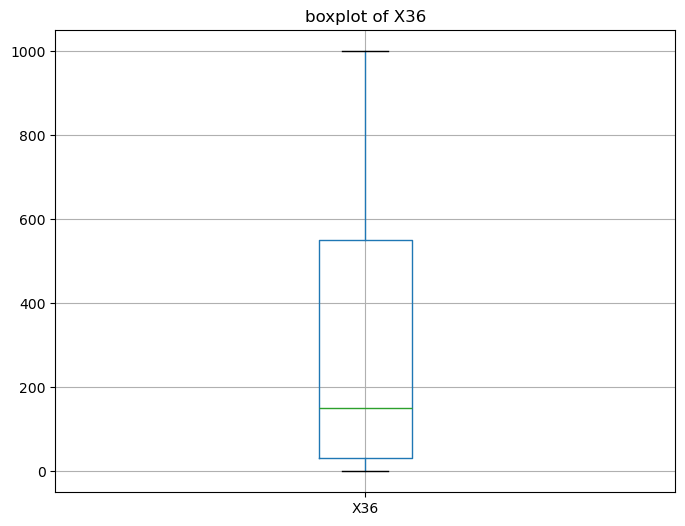

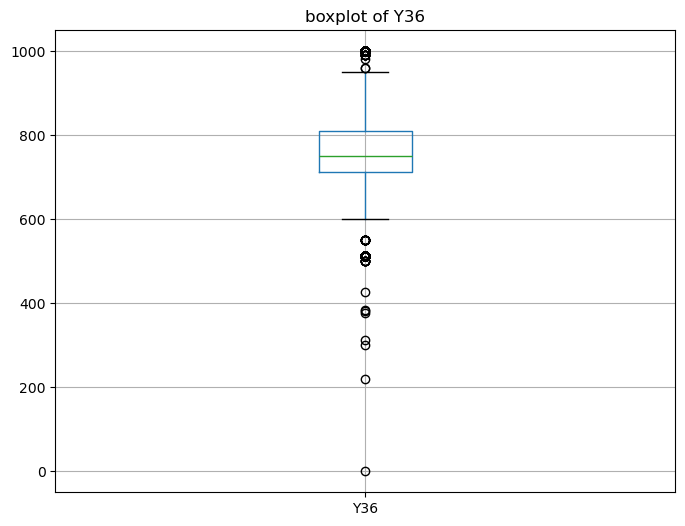

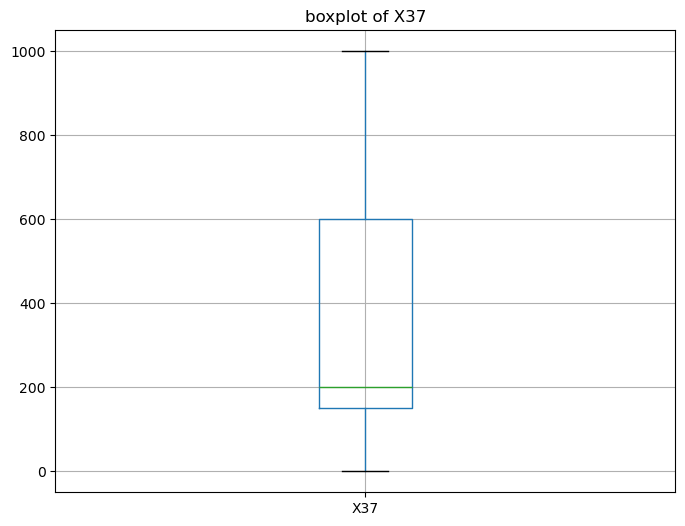

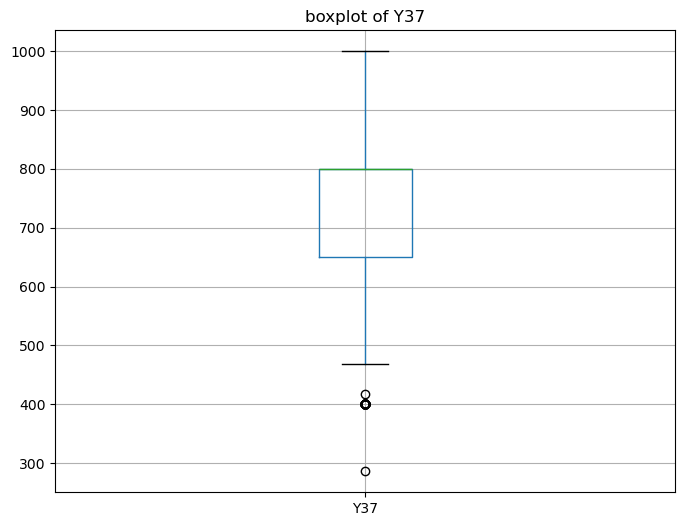

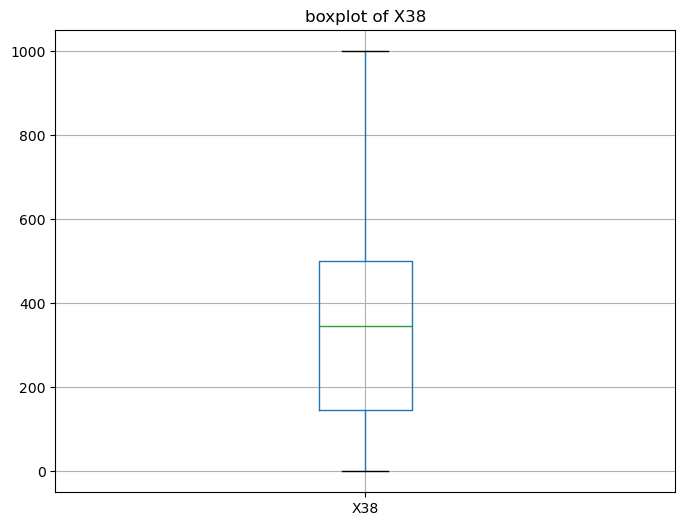

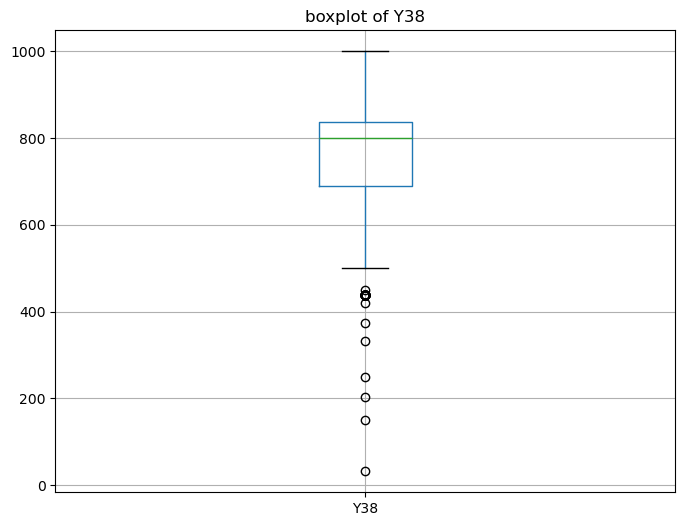

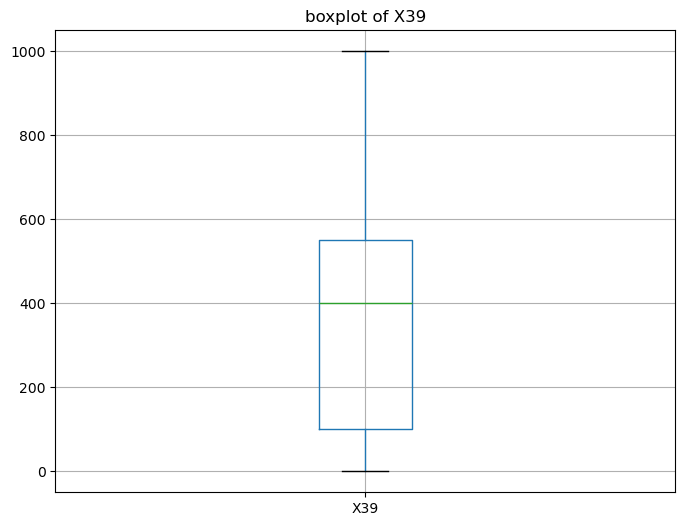

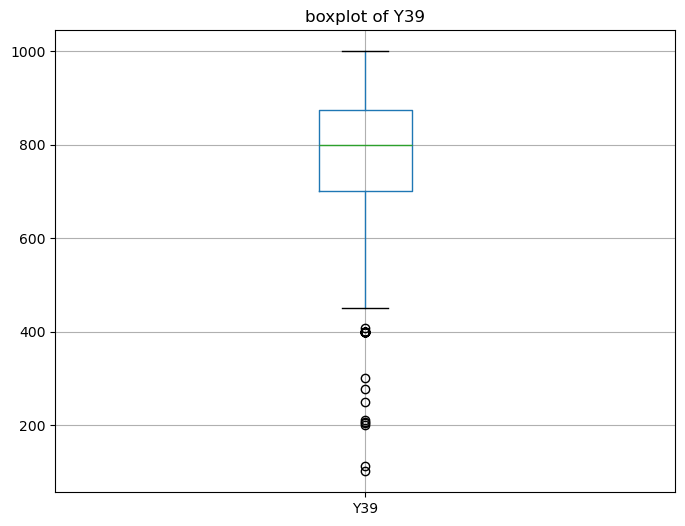

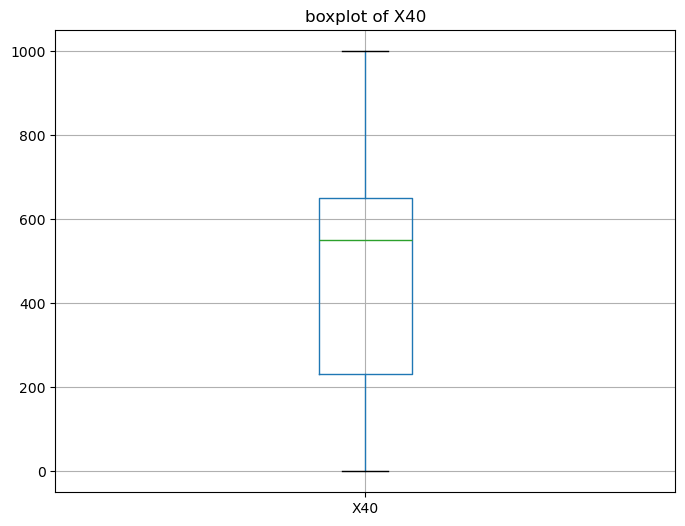

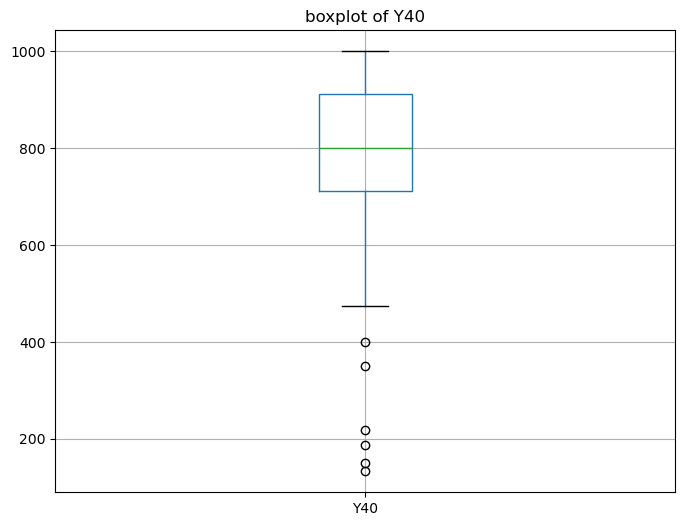

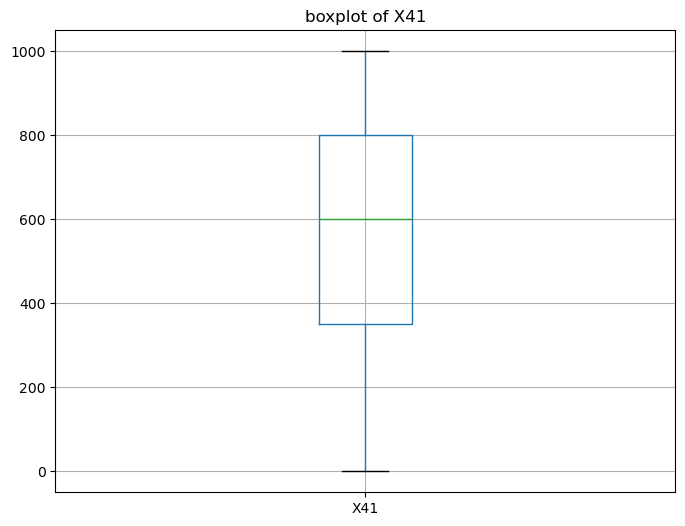

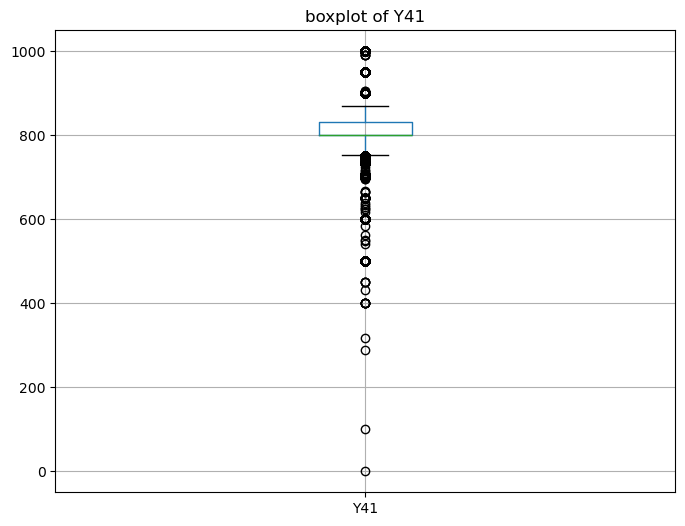

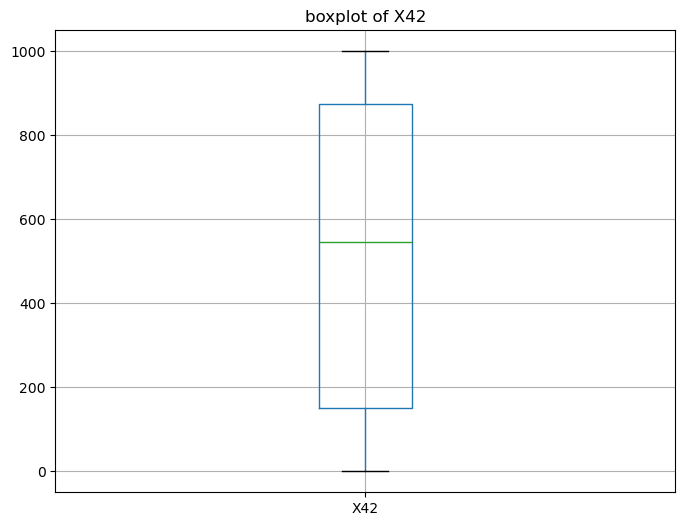

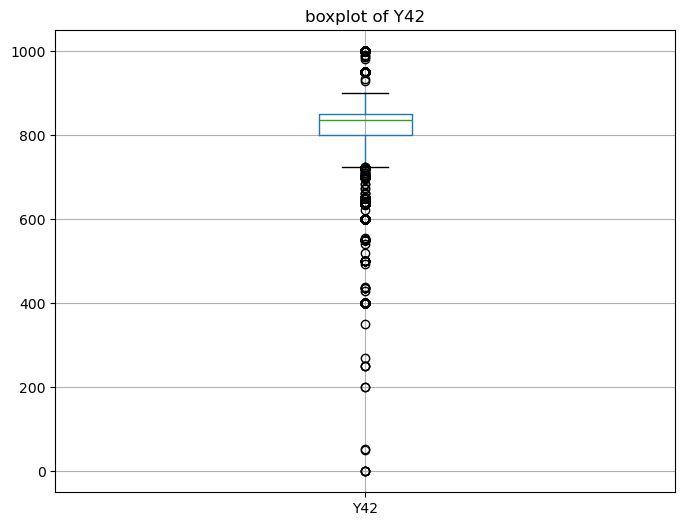

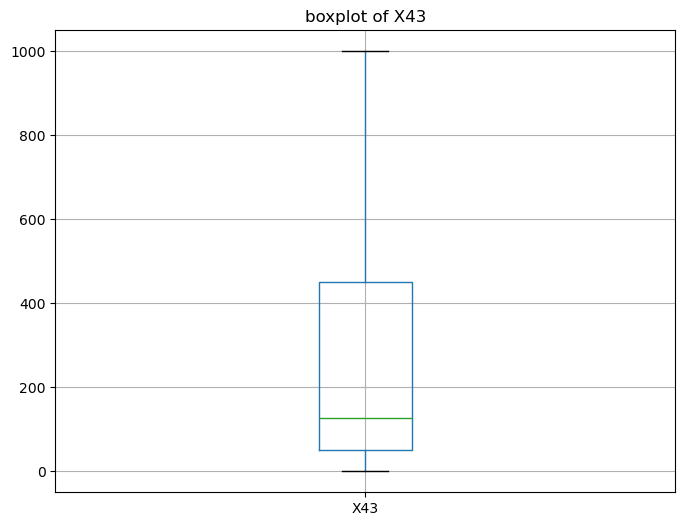

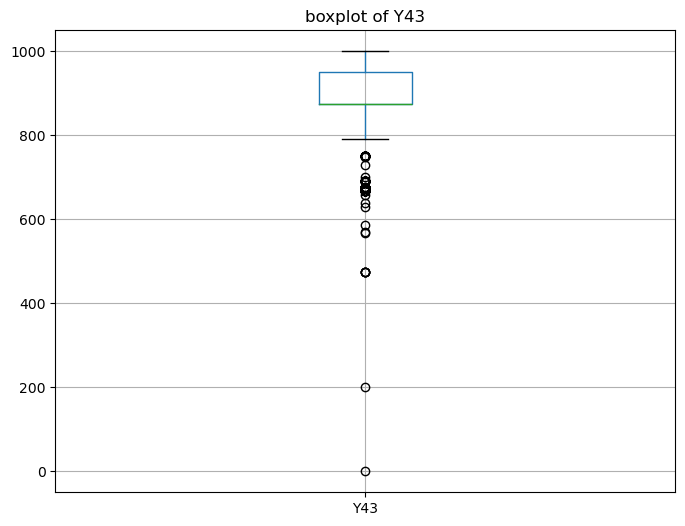

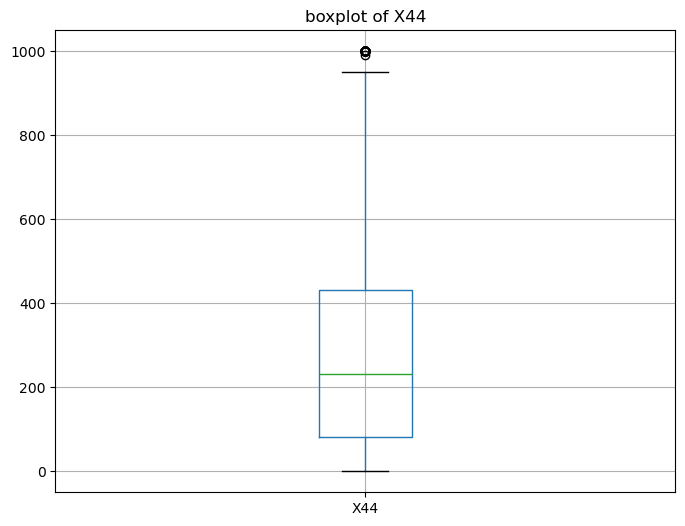

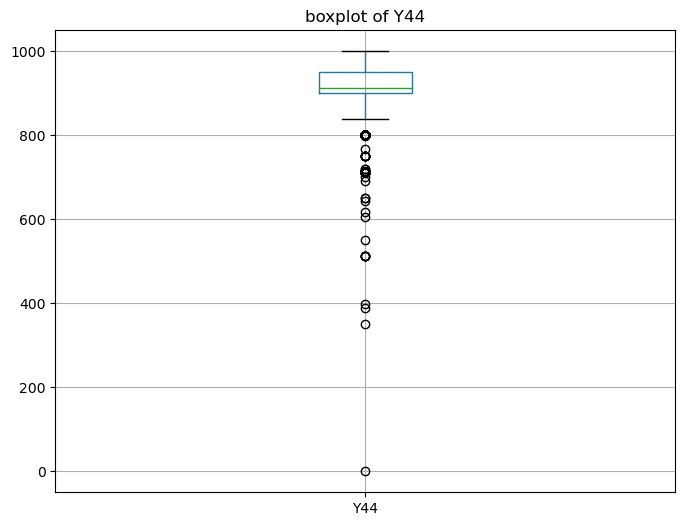

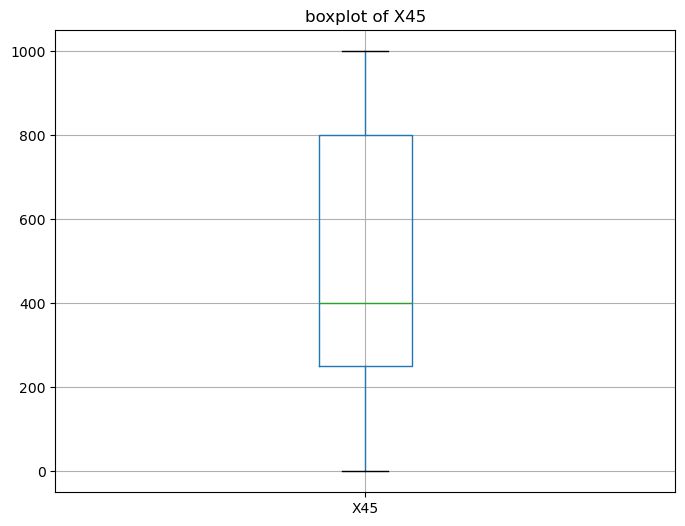

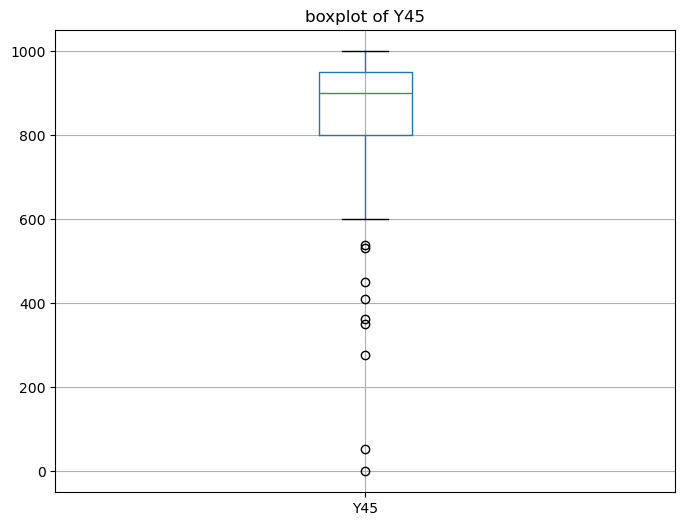

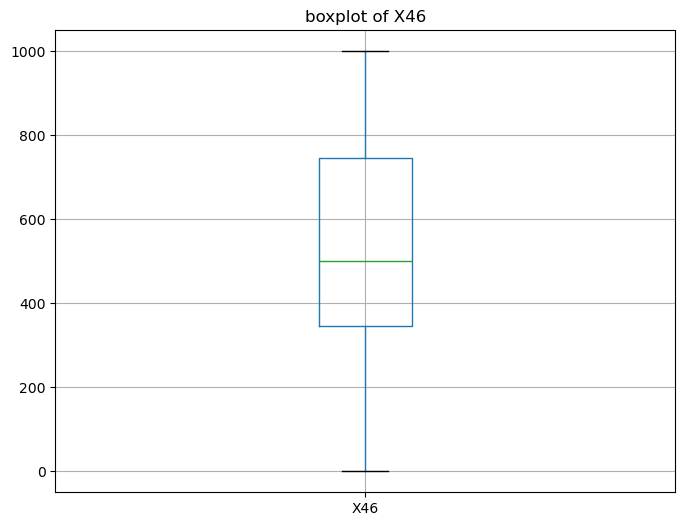

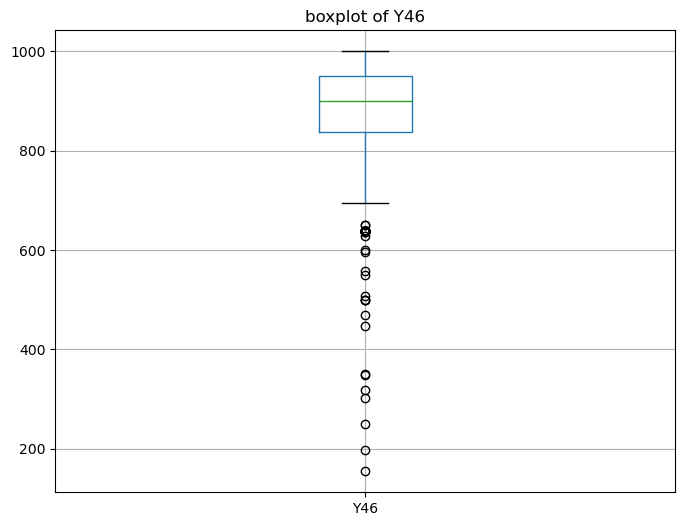

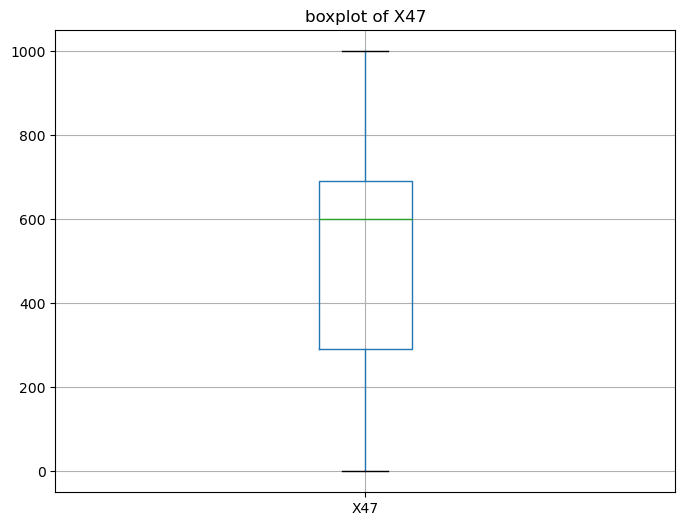

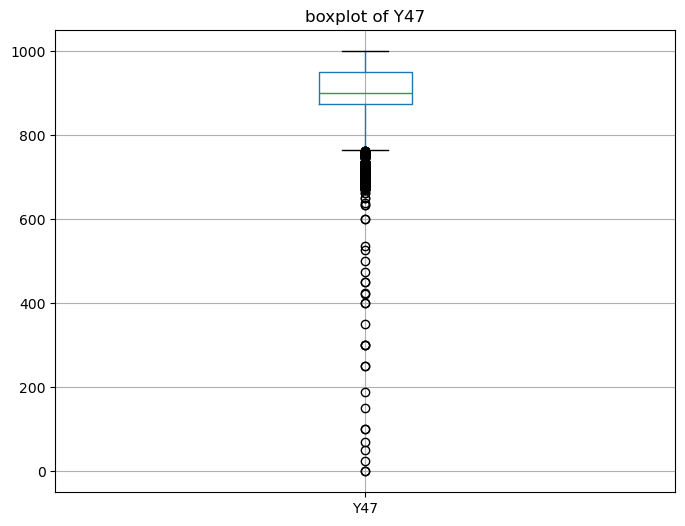

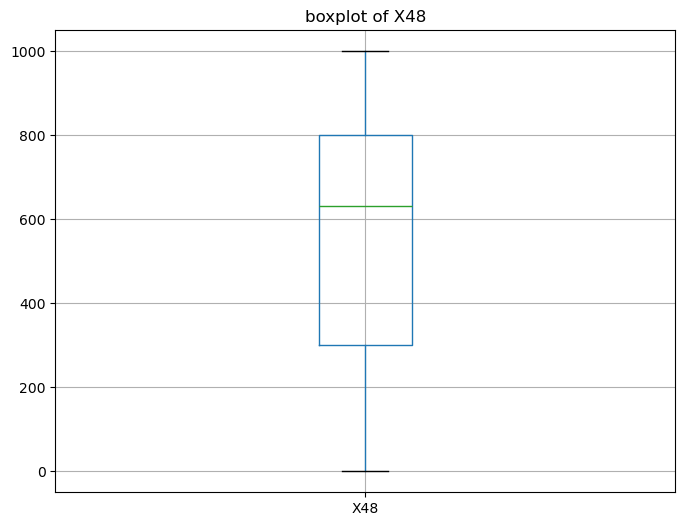

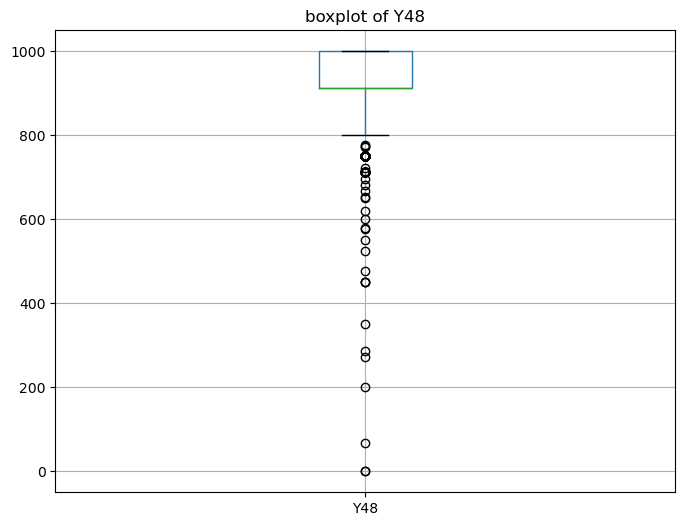

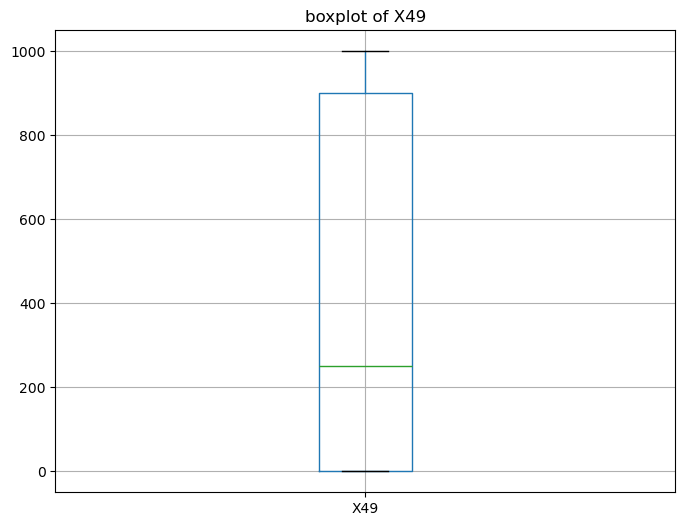

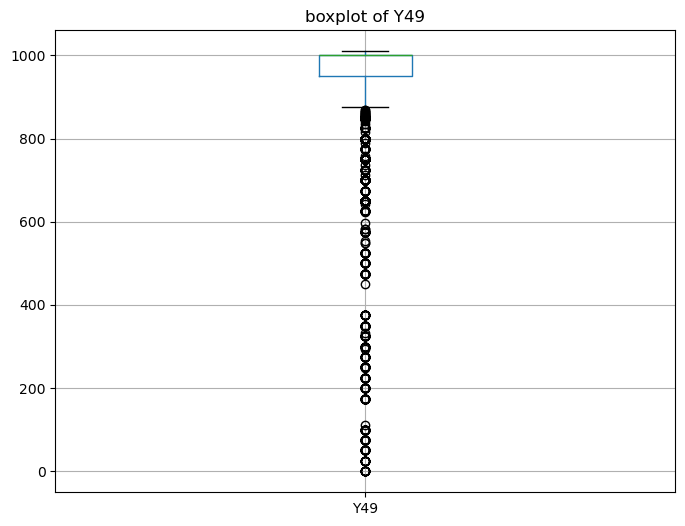

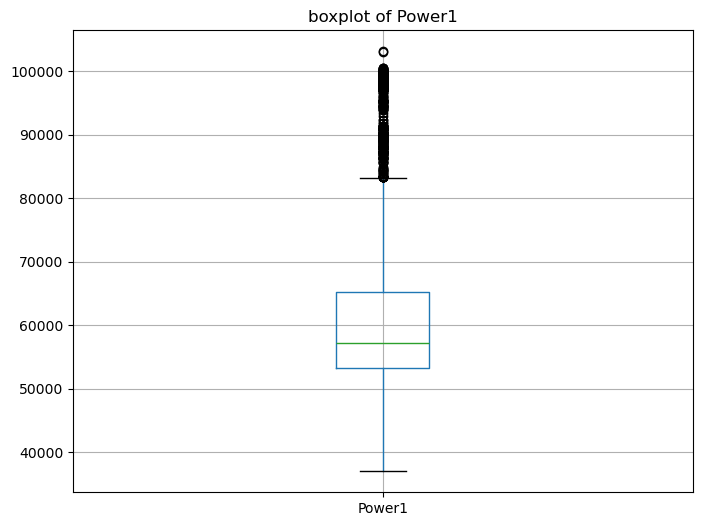

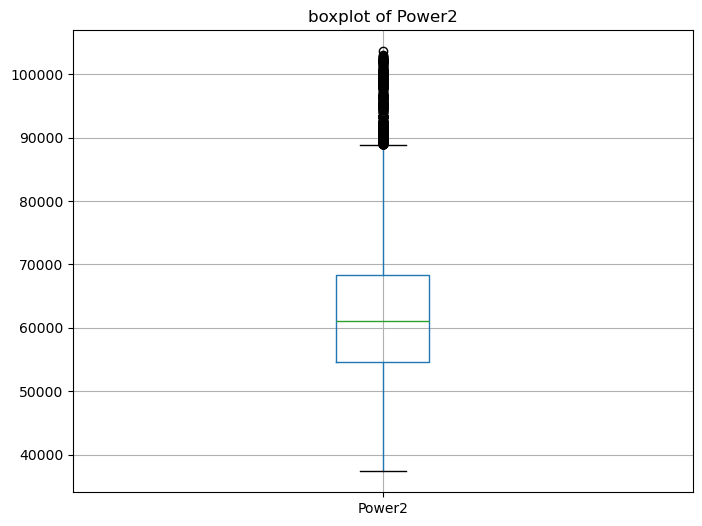

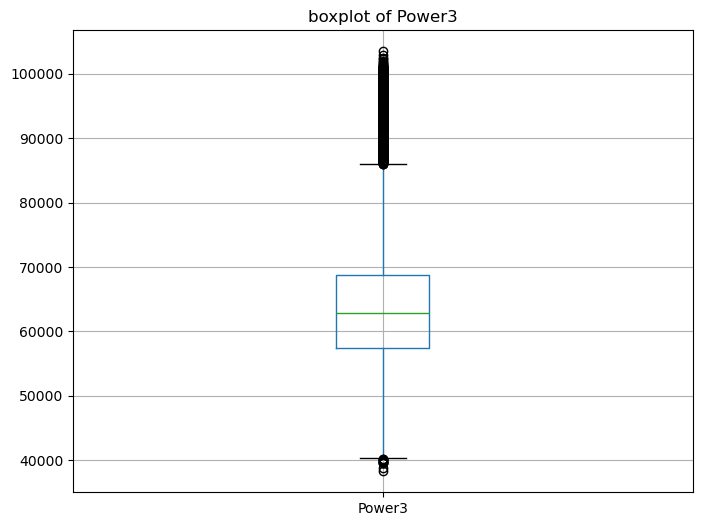

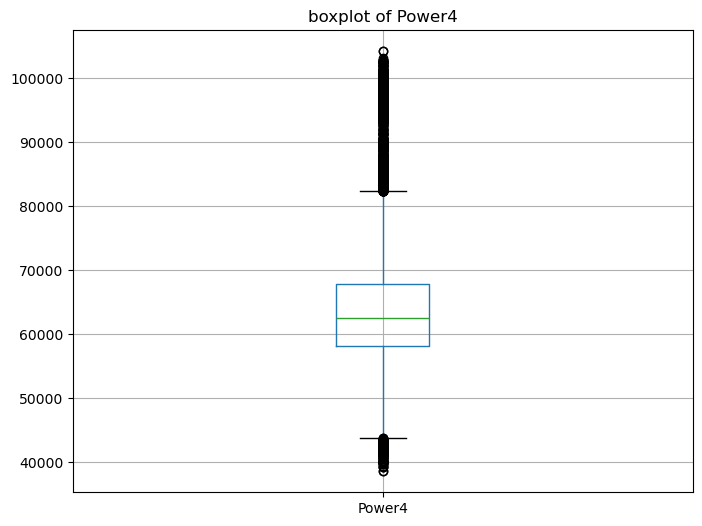

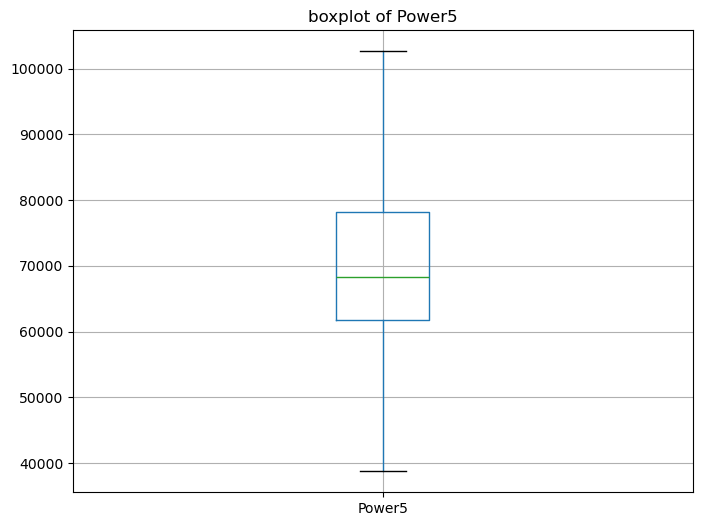

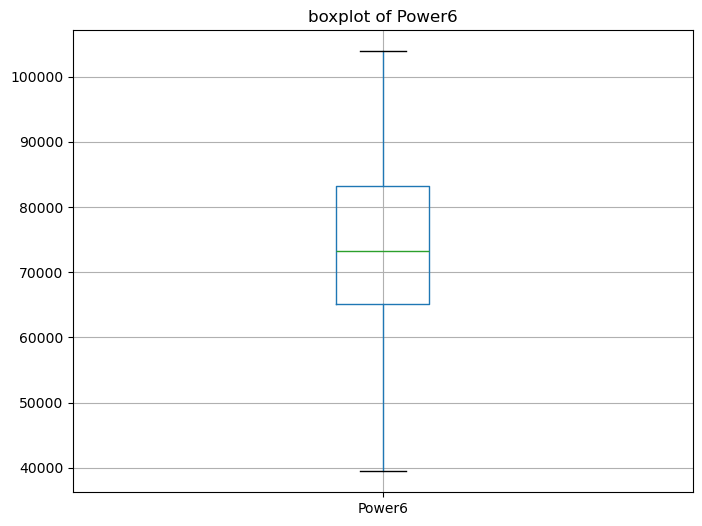

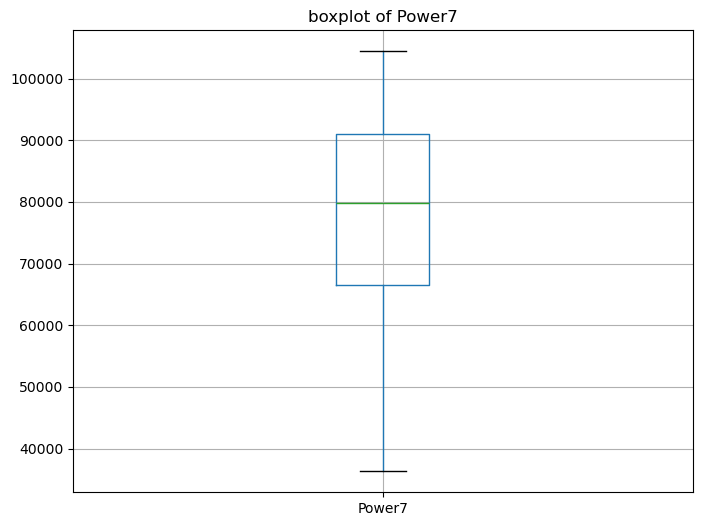

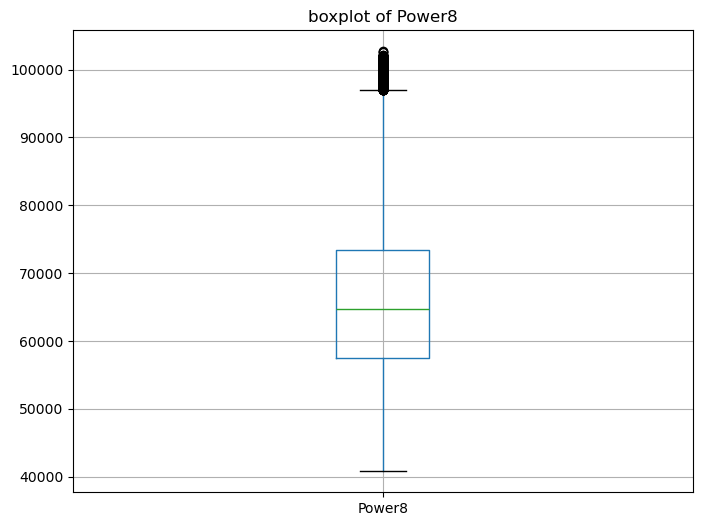

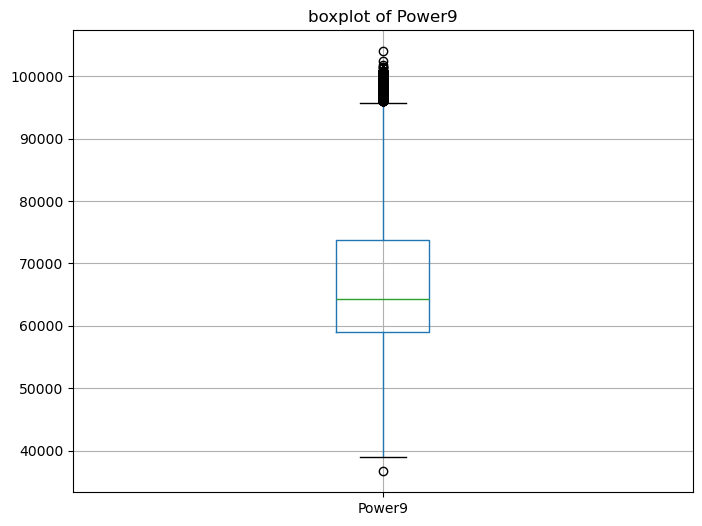

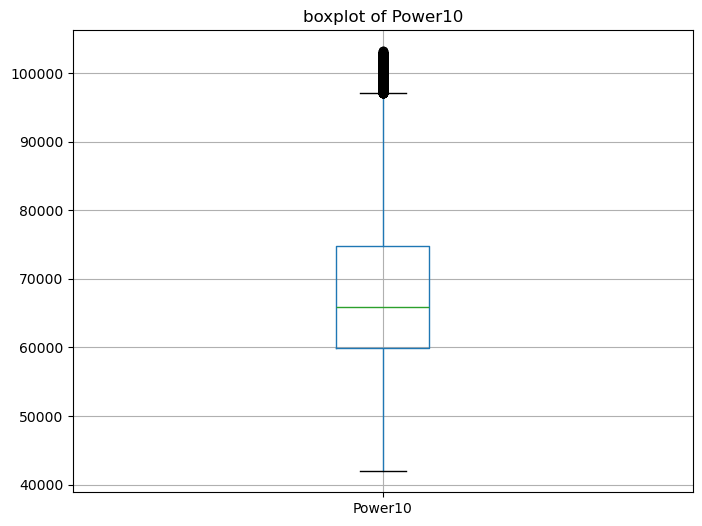

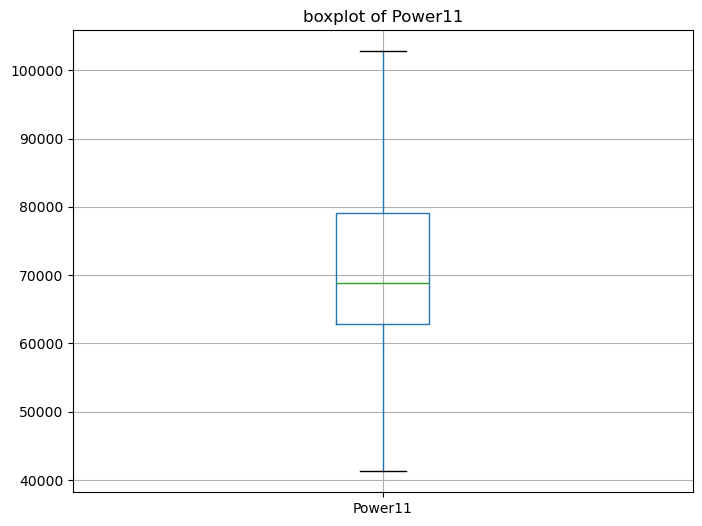

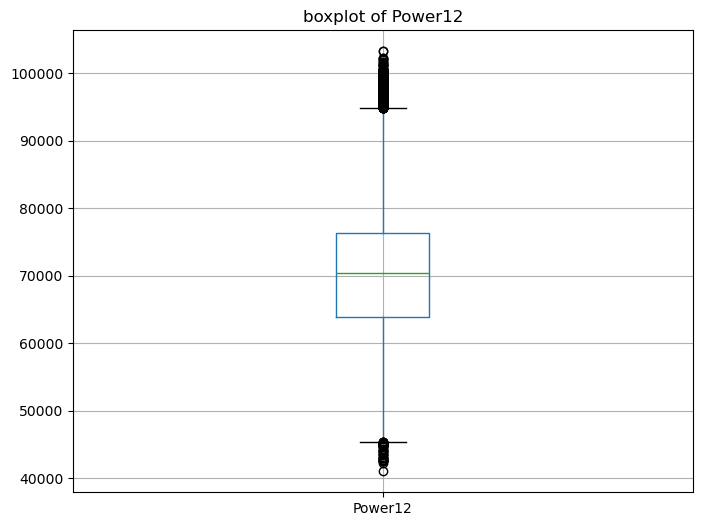

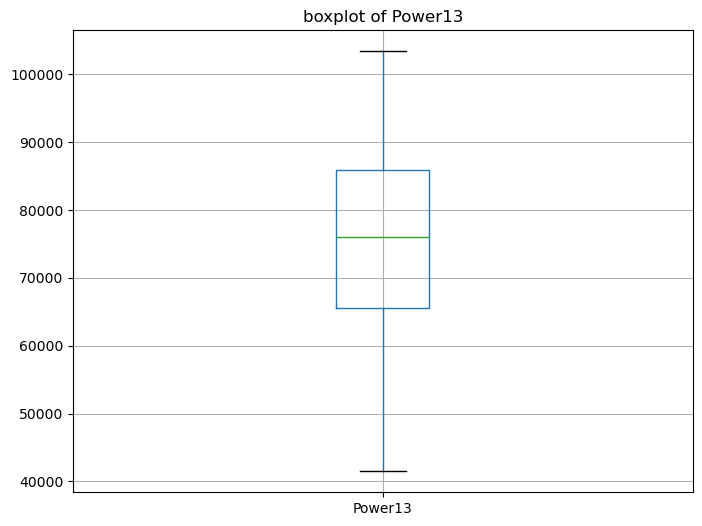

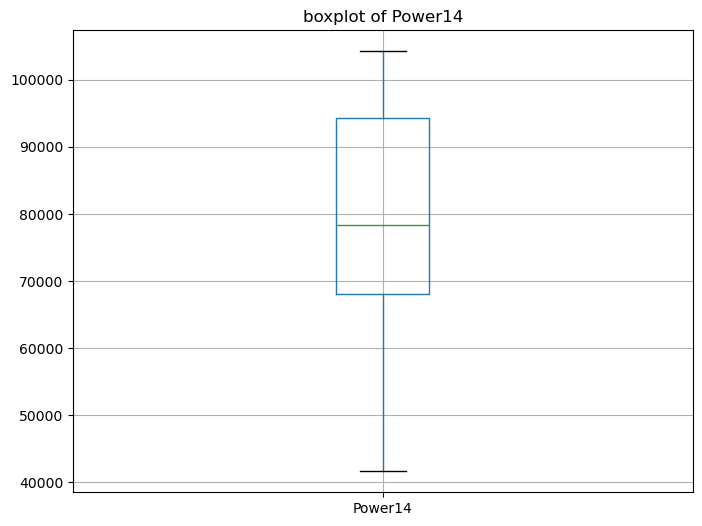

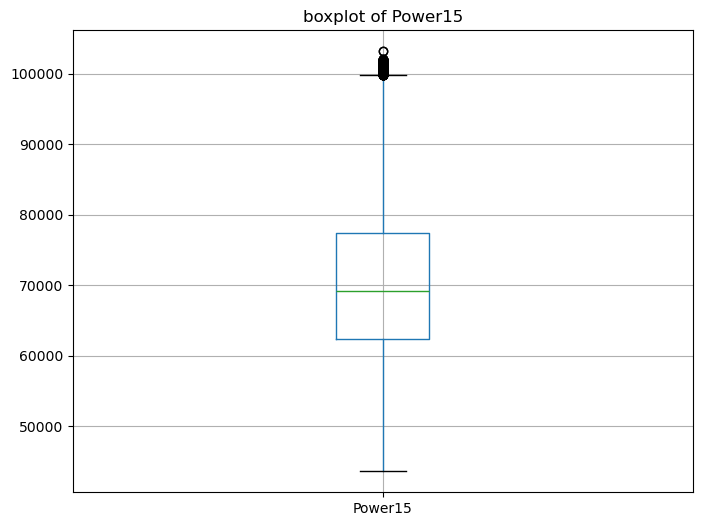

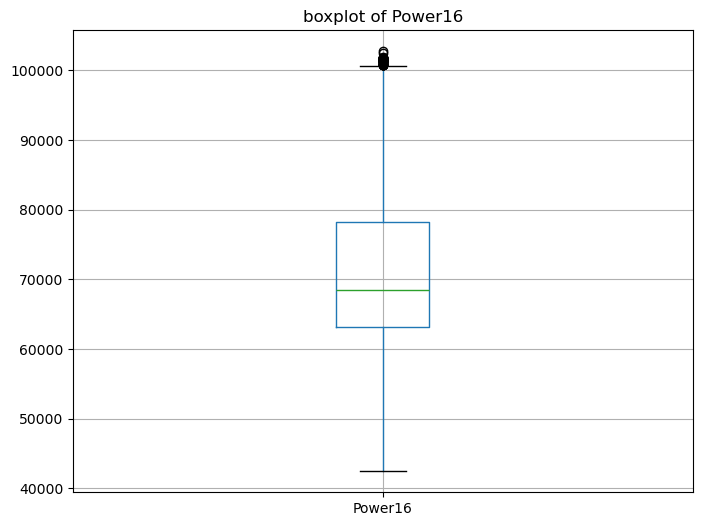

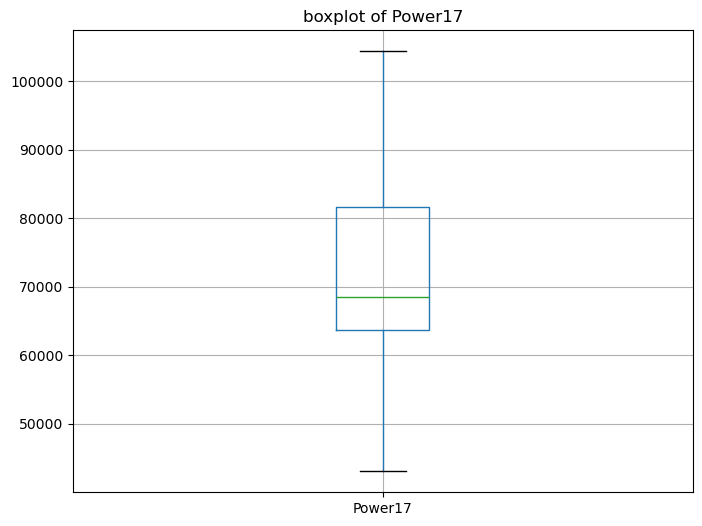

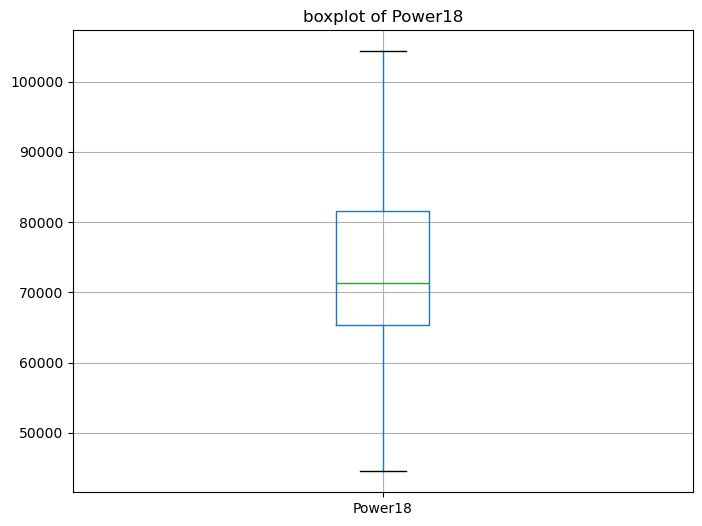

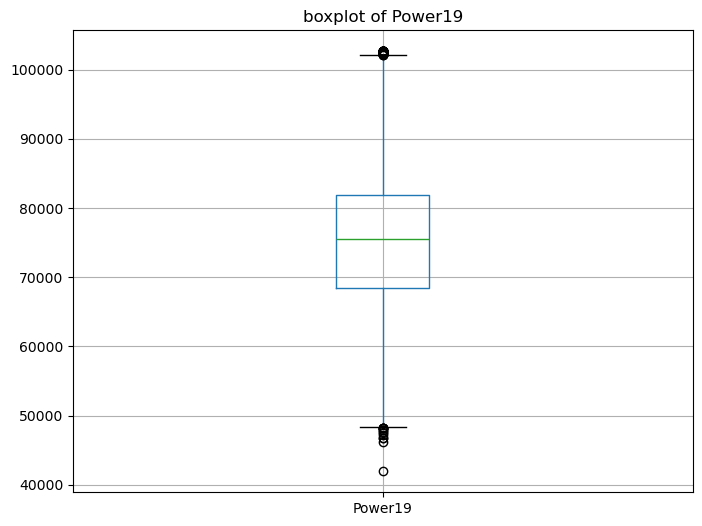

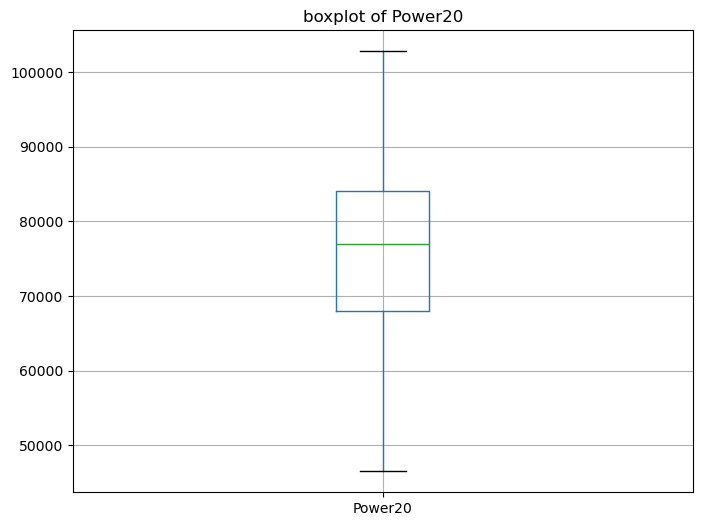

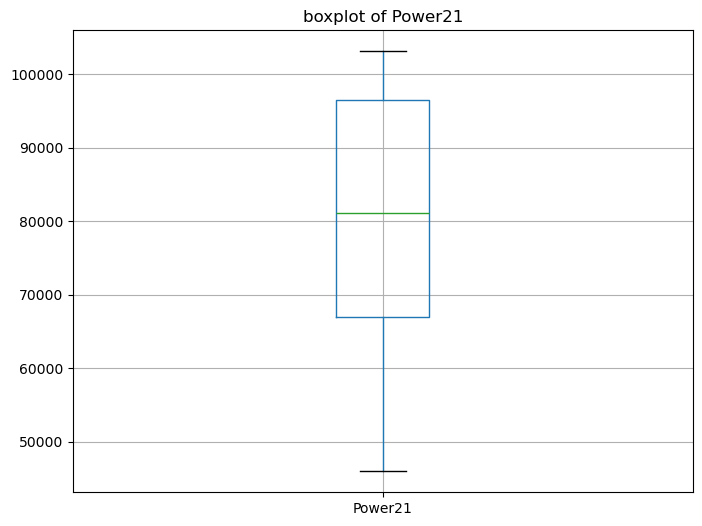

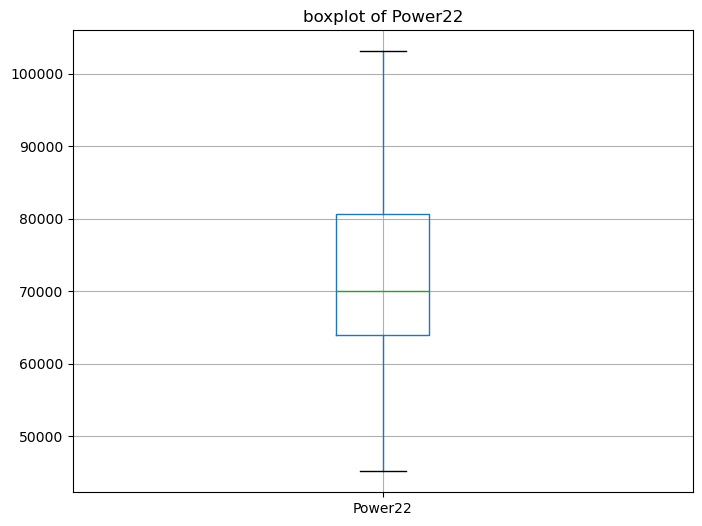

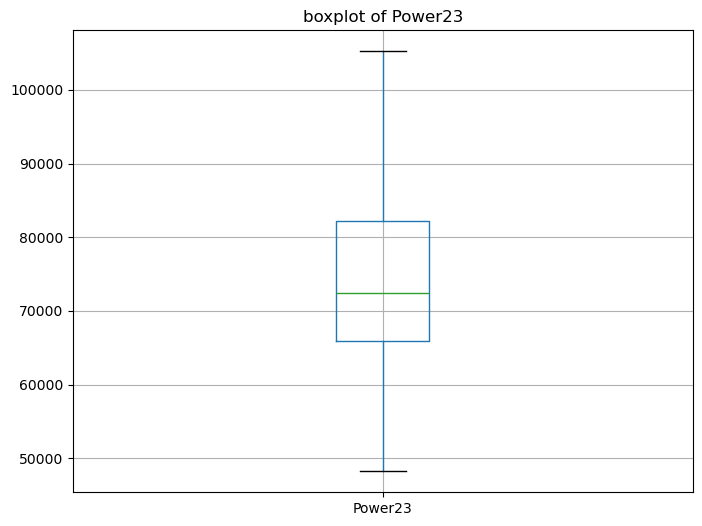

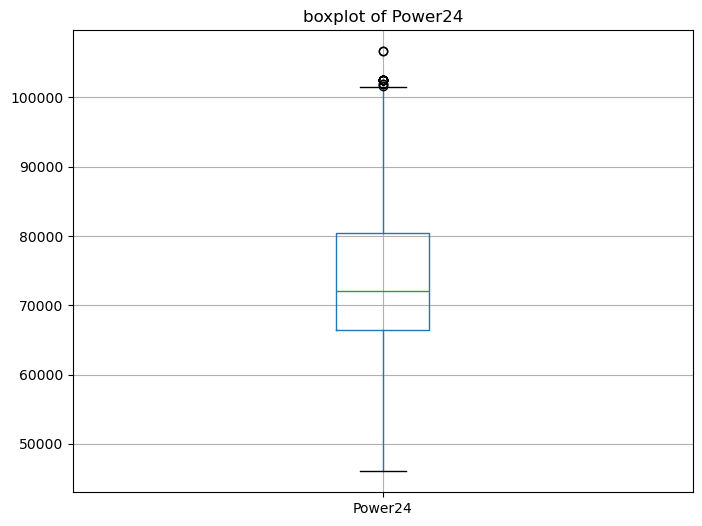

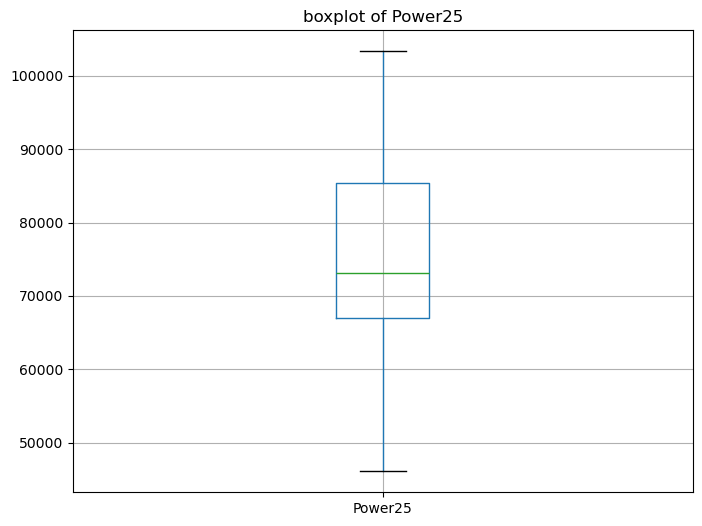

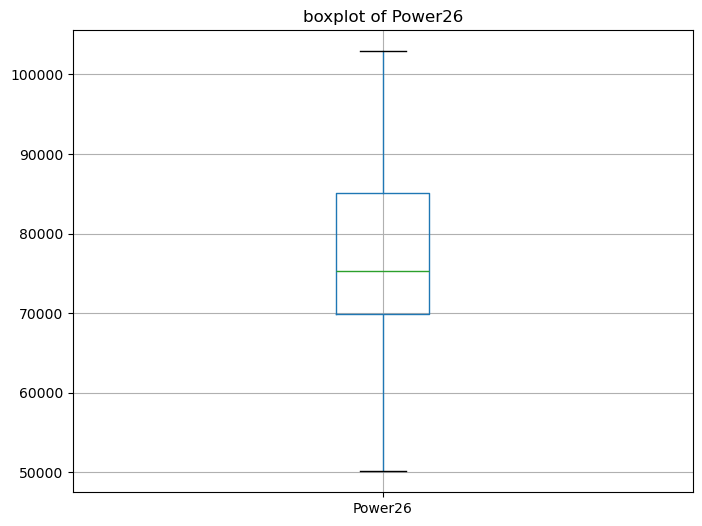

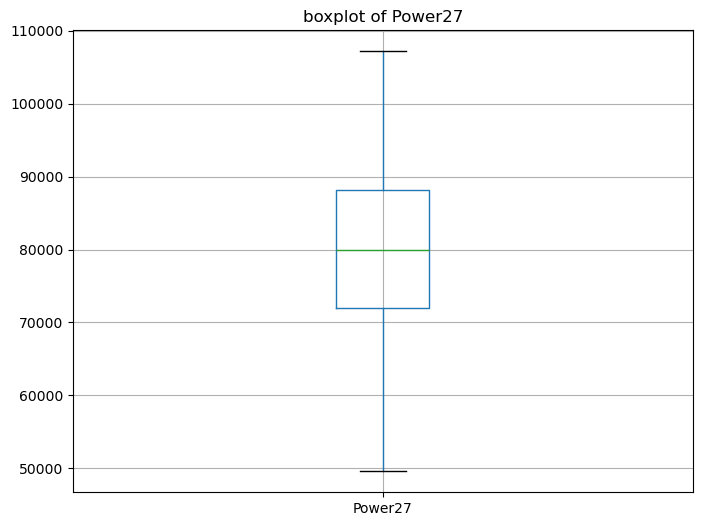

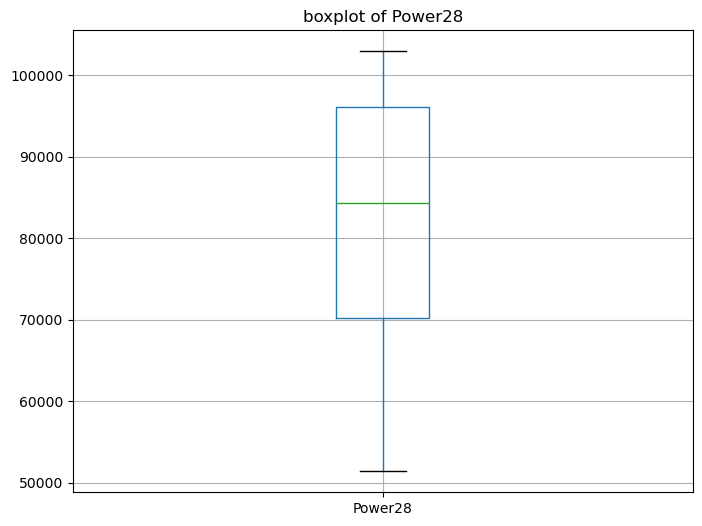

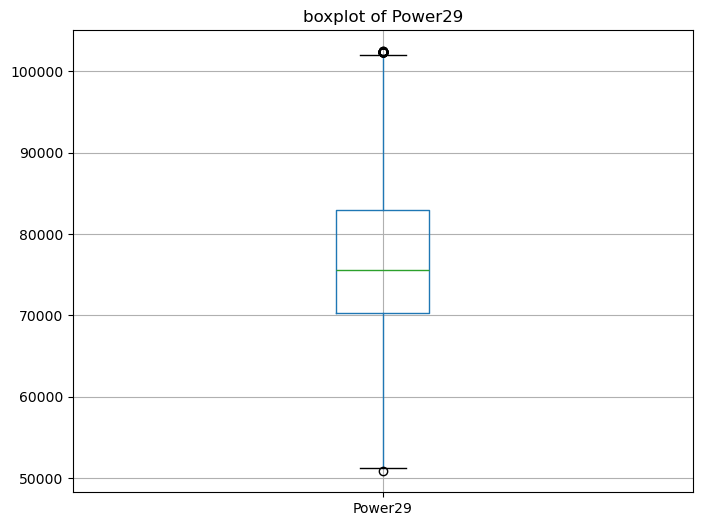

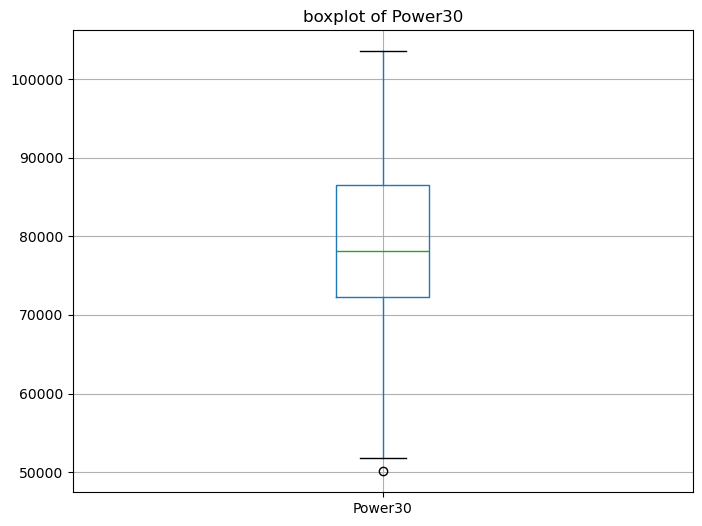

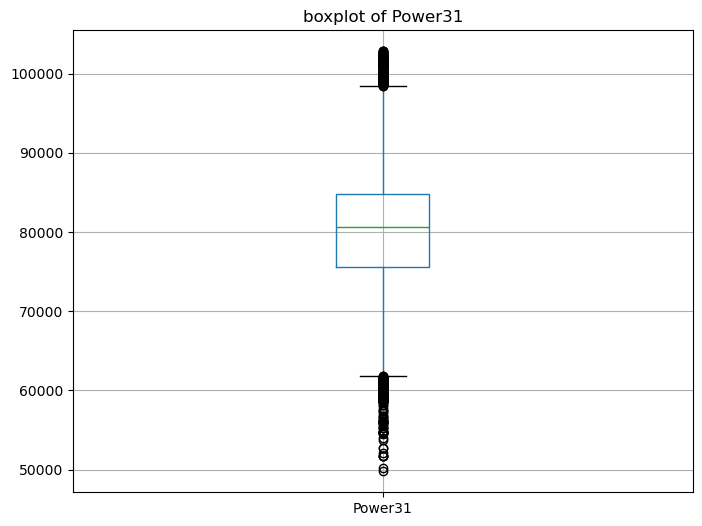

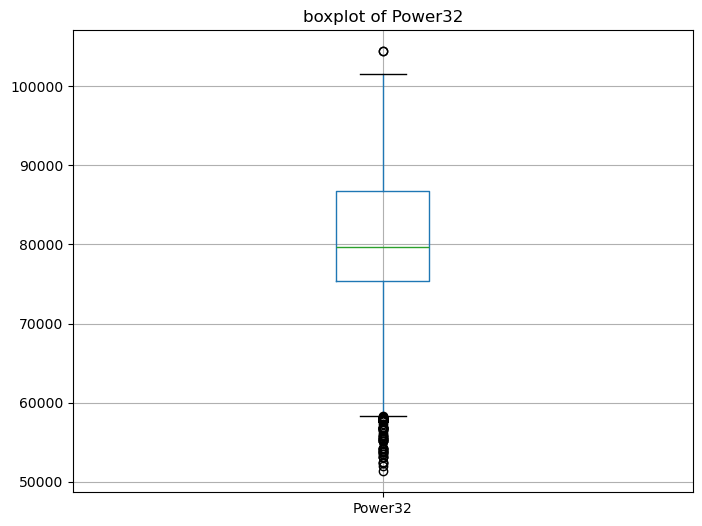

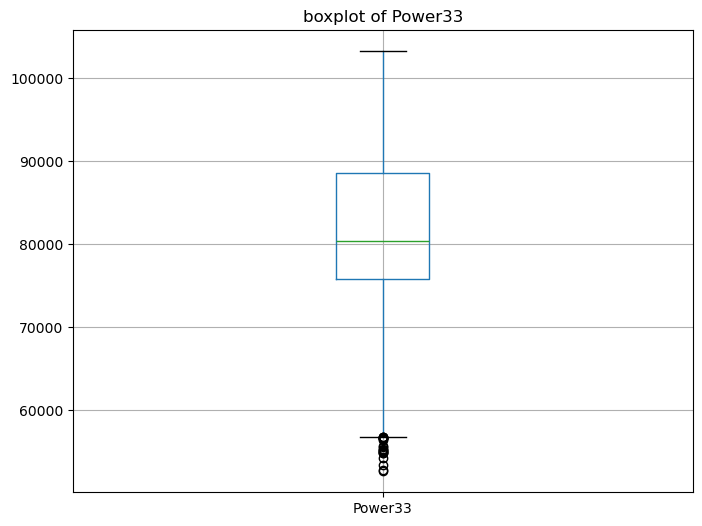

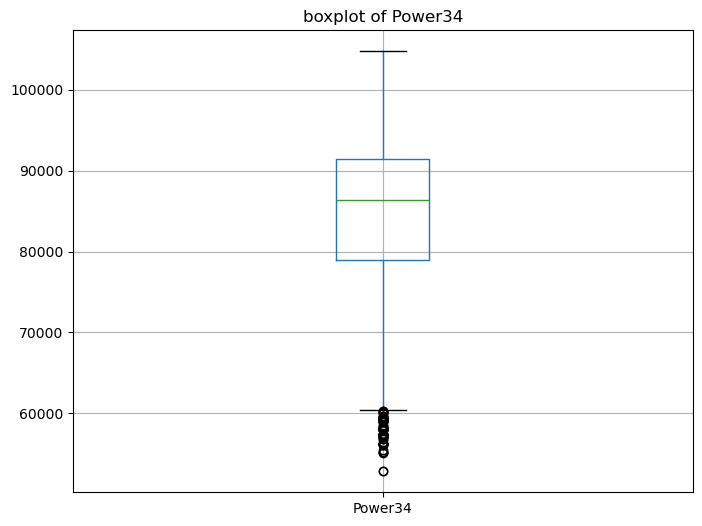

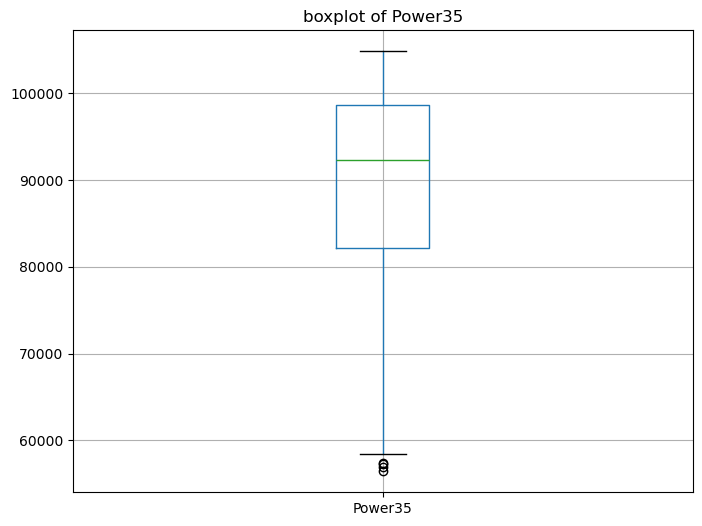

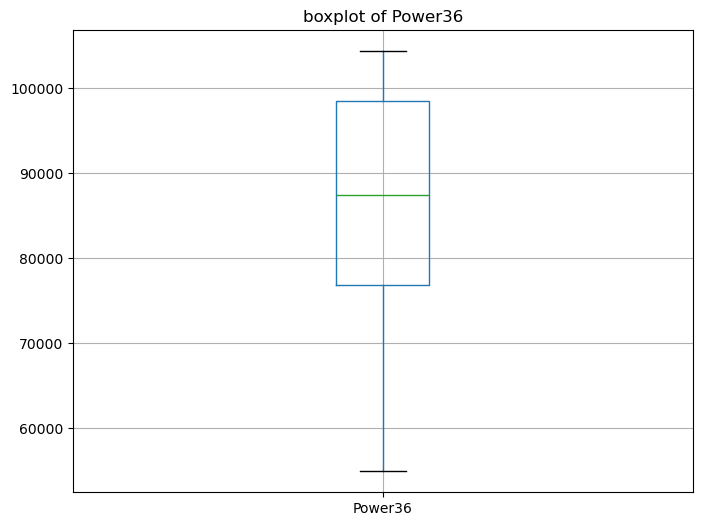

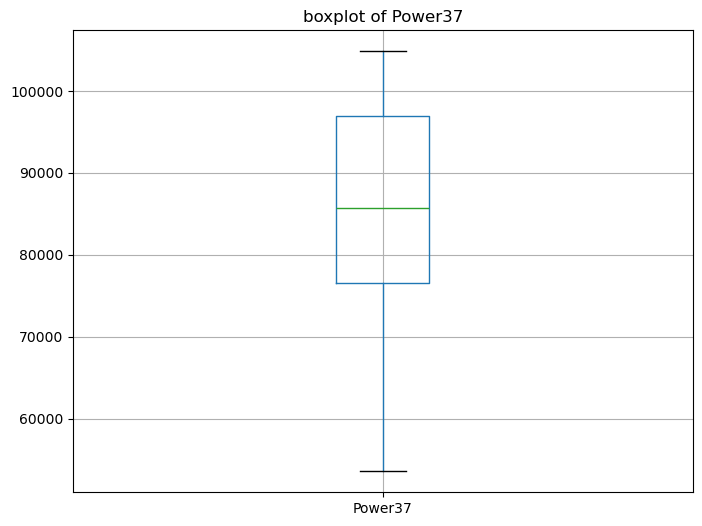

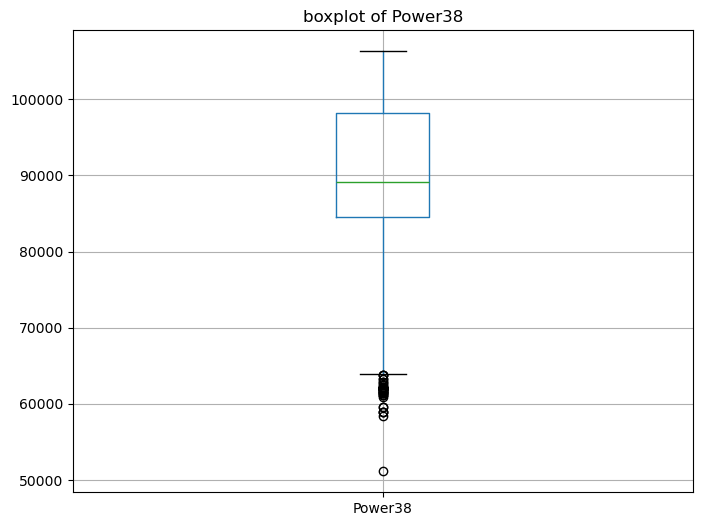

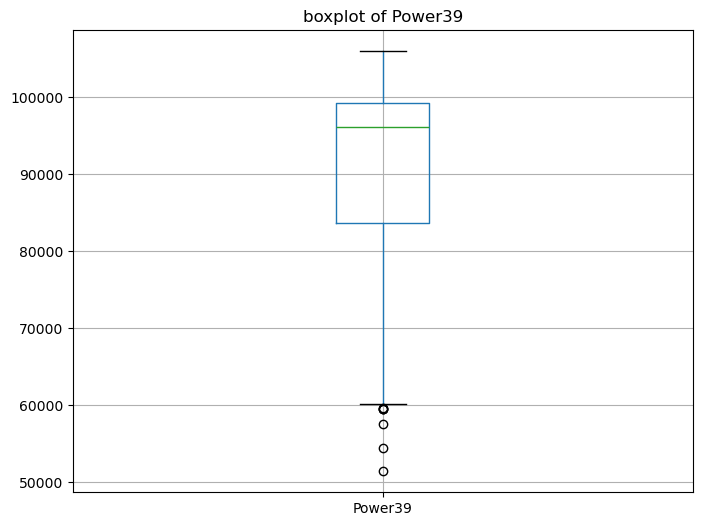

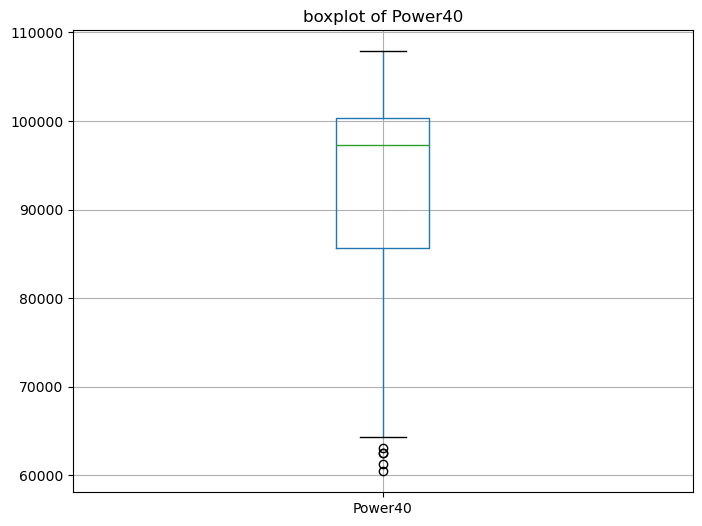

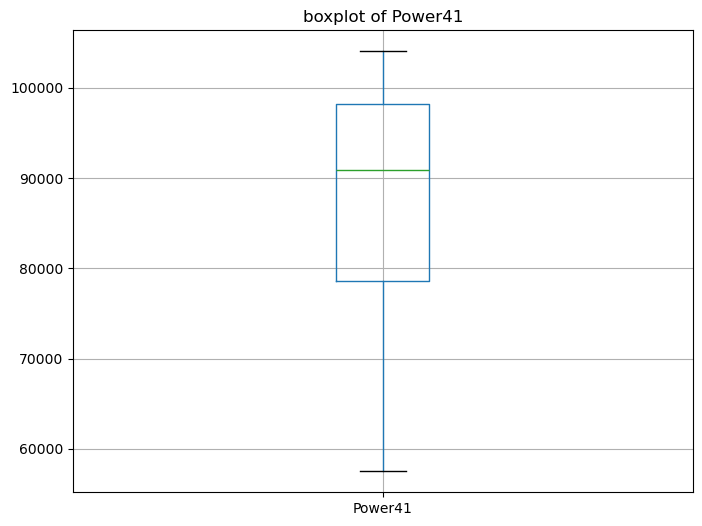

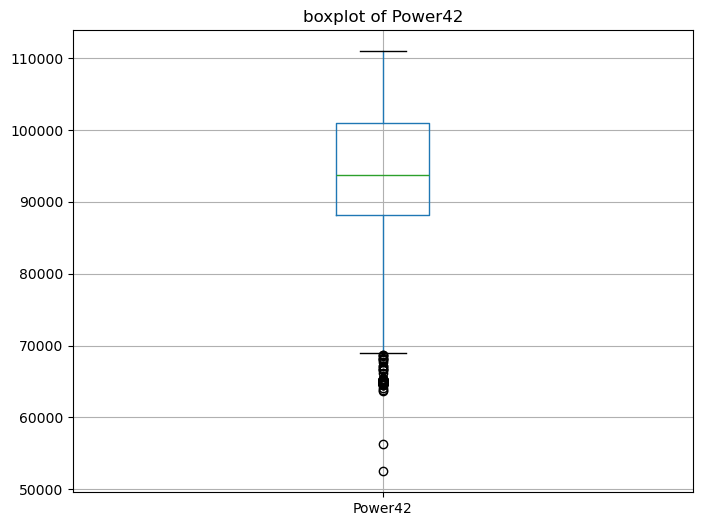

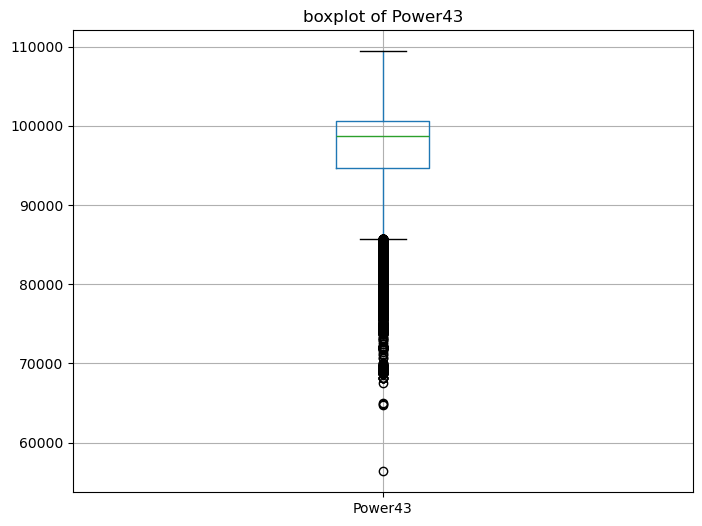

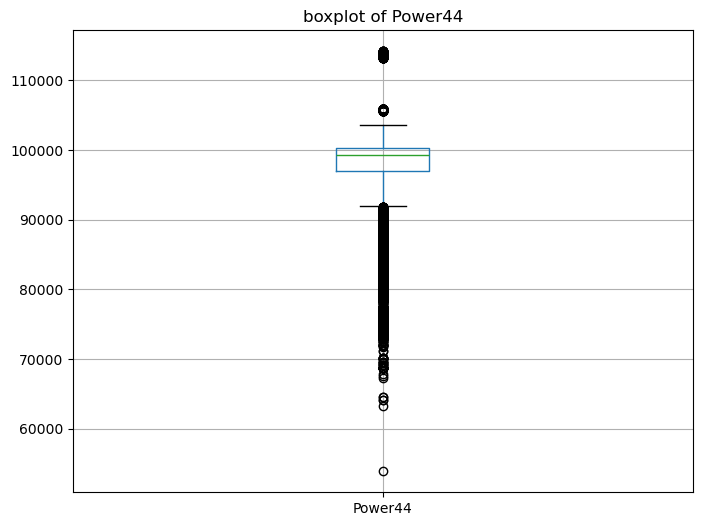

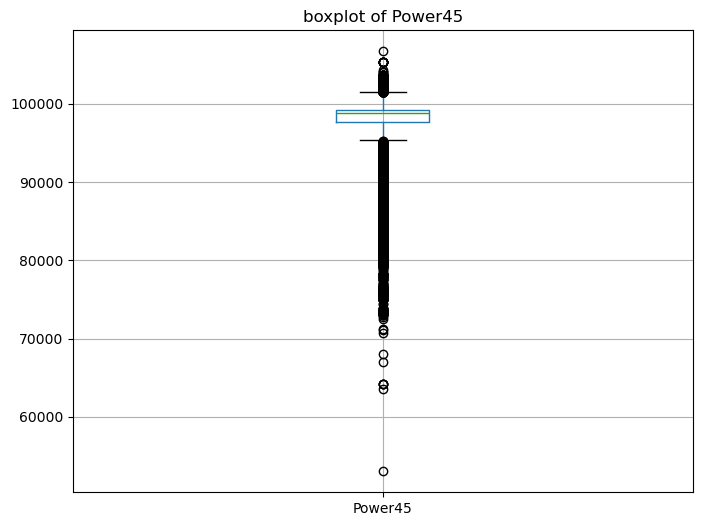

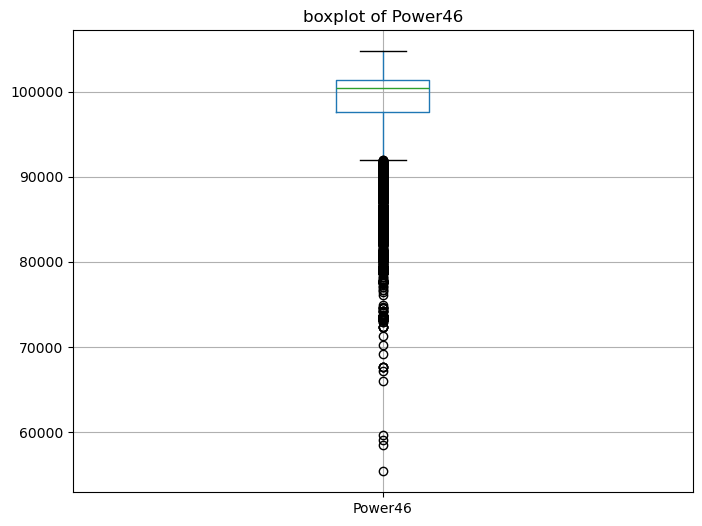

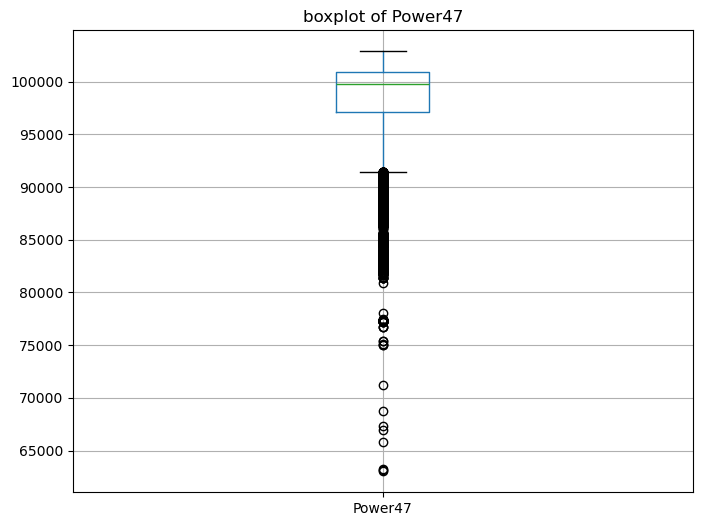

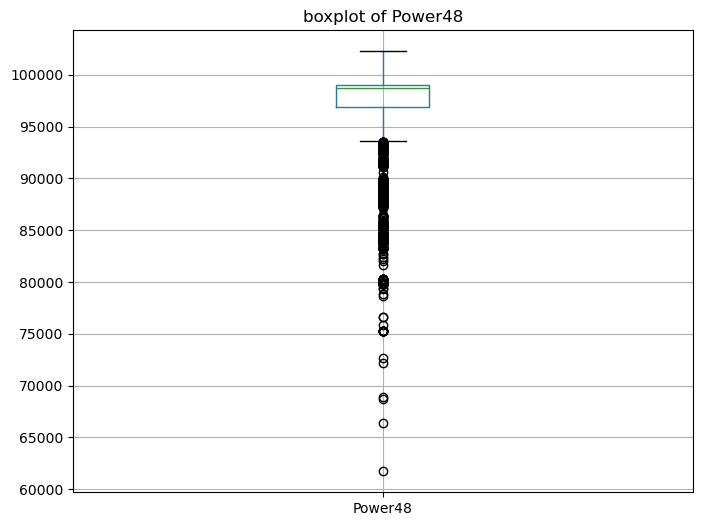

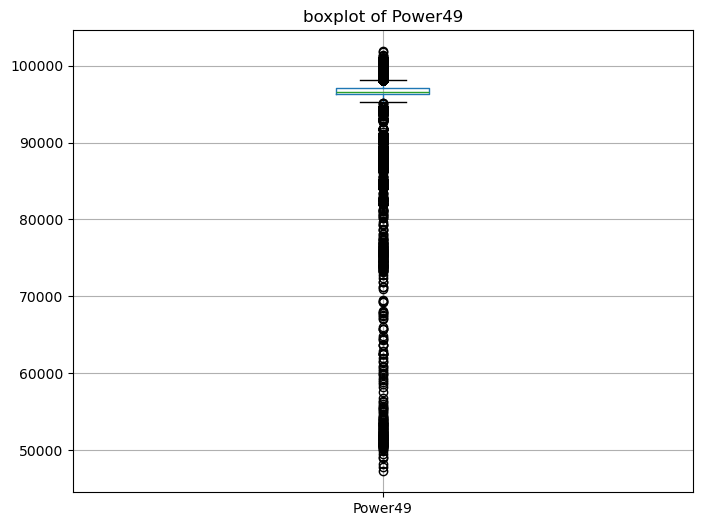

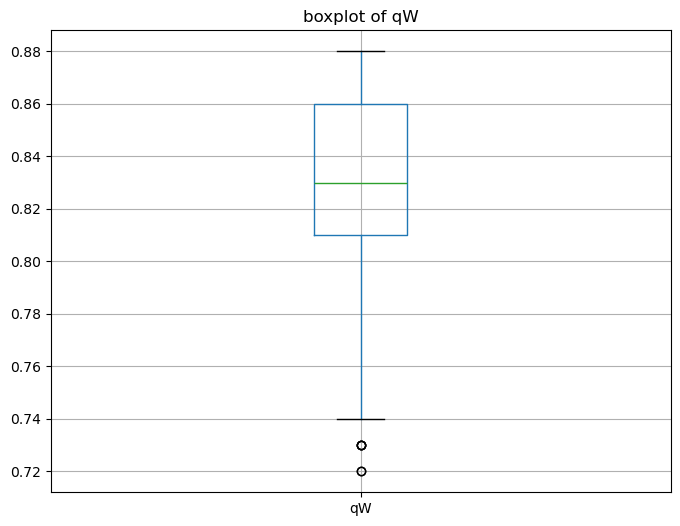

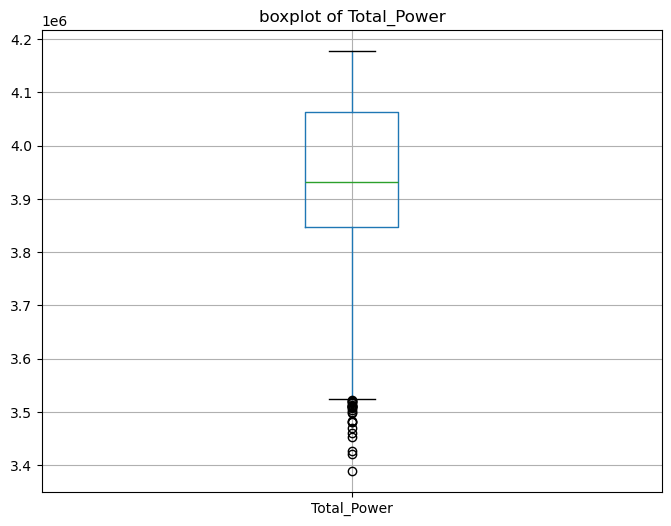

In [15]:
for column in num_cols.columns:
    plt.figure(figsize=(8,6))
    num_cols.boxplot(column=column)
    plt.title(f'boxplot of {column}')

In [16]:
# Function to remove outliers using IQR method (capping)

In [17]:
def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = np.where(data < lower_bound, lower_bound, data)
    data = np.where(data > upper_bound, upper_bound, data)
    return data

In [18]:
df.iloc[:, :] = df.iloc[:, :].apply(remove_outliers_iqr)

In [19]:
# Identify target variable

In [20]:
target_variable = 'Total_Power'

In [21]:
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove(target_variable)

In [22]:
pt = PowerTransformer(method='yeo-johnson')

In [23]:
df[numerical_features] = pt.fit_transform(df[numerical_features])


C:\Users\anand\anaconda3\Lib\site-packages\numpy\core\_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [24]:
correlation_matrix = df.corr()

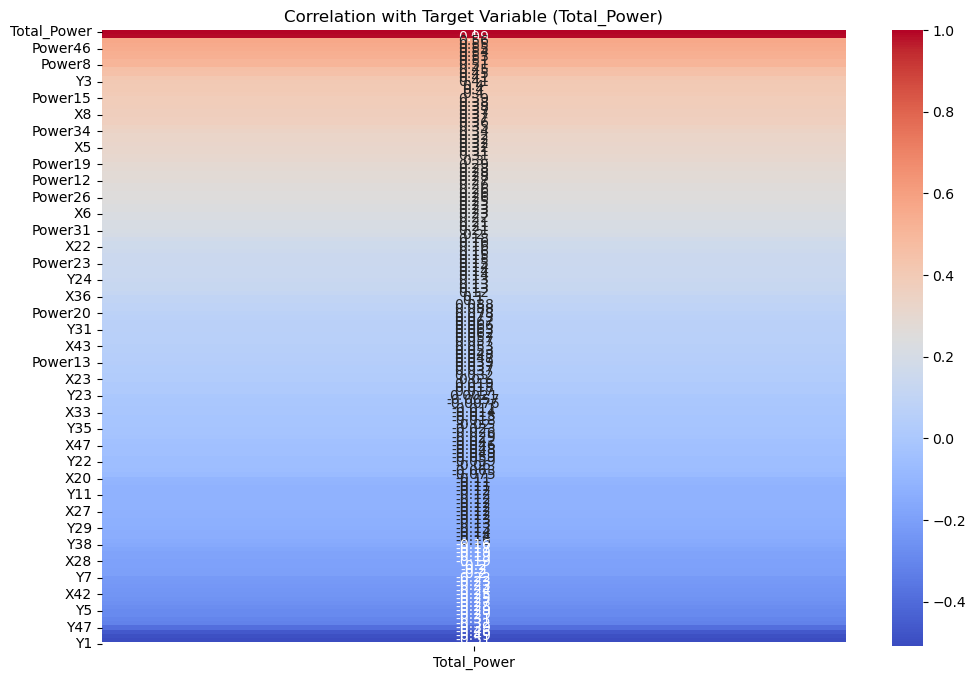

In [25]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[target_variable].sort_values(ascending=False).to_frame(), annot=True, cmap="coolwarm")
plt.title("Correlation with Target Variable (Total_Power)")
plt.show()

In [26]:
# Feature selection using SelectKBest

In [27]:
num_features = 20
X = df[numerical_features]
y = df[target_variable]
selector = SelectKBest(score_func=f_regression, k=num_features)
X_new = selector.fit_transform(X, y)

In [28]:
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['X1', 'Y3', 'Y4', 'Y45', 'Y46', 'Y47', 'X49', 'Power1', 'Power2',
       'Power8', 'Power10', 'Power15', 'Power18', 'Power38', 'Power39',
       'Power40', 'Power43', 'Power46', 'Power47', 'qW'],
      dtype='object')


In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[selected_features])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [31]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (28834, 20)
X_test shape: (7209, 20)
y_train shape: (28834,)
y_test shape: (7209,)


In [32]:
# model building

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [34]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regression": SVR()
}


In [35]:
results = {}

In [36]:
# evaluation

In [37]:
# Train and evaluate each model
for name, model in models.items():
    if name in ["Support Vector Regression", "Gradient Boosting"]:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

In [38]:
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

In [39]:
 results[name] = {"MAE": mae, "MSE": mse, "R²": r2}

In [40]:
results_df = pd.DataFrame(results).T
print(results_df)

                                     MAE           MSE        R²
Support Vector Regression  101016.072926  1.417549e+10  0.036861


In [41]:
#hyper parameter tuning

In [42]:
models = {
    "Random Forest": (RandomForestRegressor(random_state=42), {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    }),
    "Gradient Boosting": (GradientBoostingRegressor(random_state=42), {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 10]
    }),
    "SVR": (SVR(), {
        "kernel": ["linear", "rbf"],
        "C": [0.1, 1, 10],
        "gamma": ["scale", "auto"]
    })
}

best_models = {}
best_r2_scores = {}

In [43]:
for name, (model, params) in models.items():
    print(f" Tuning {name}...")
    
    grid_search = GridSearchCV(model, params, cv=5, scoring="r2", n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    
    best_models[name] = grid_search.best_estimator_
    y_pred = grid_search.best_estimator_.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    best_r2_scores[name] = r2

    print(f"✅ Best Parameters for {name}: {grid_search.best_params_}")
    print(f"📈 Best R² Score for {name}: {r2:.4f}\n")

 Tuning Random Forest...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
✅ Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
📈 Best R² Score for Random Forest: 0.9977

 Tuning Gradient Boosting...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
✅ Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}
📈 Best R² Score for Gradient Boosting: 0.9976

 Tuning SVR...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
✅ Best Parameters for SVR: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
📈 Best R² Score for SVR: 0.9603



In [44]:
#print best model

In [45]:
best_model_name = max(best_r2_scores, key=best_r2_scores.get)
print(f"🏆 Best Model: {best_model_name} with R² Score: {best_r2_scores[best_model_name]:.4f}")

🏆 Best Model: Random Forest with R² Score: 0.9977


In [94]:
best_model = grid_search.best_estimator_
best_model

SVR(C=10, kernel='linear')

In [96]:
best_model=RandomForestRegressor(max_features ='sqrt',n_estimators=300,n_jobs=-1,random_state=42)

In [98]:
best_model.fit(X_train,y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=300, n_jobs=-1,
                      random_state=42)

In [100]:
y_pred=best_model.predict(X_test)

In [102]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [106]:
print(f"mae:{mae},mse:{mse},r2:{r2}")

mae:2916.9320632645945,mse:66294734.53239431,r2:0.9954956705004783


In [108]:
import joblib

In [110]:
joblib.dump(best_model,"RandomForest_Model.joblib")

['RandomForest_Model.joblib']

In [112]:
loaded_model=joblib.load("RandomForest_Model.joblib")

In [142]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

In [130]:
pipeline=([
    ('imputer',SimpleImputer(strategy='mean')),
    ('model',best_model)])

In [136]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [144]:
pipeline=Pipeline([
    ('scaler',StandardScaler()),
    ('classifier',LogisticRegression())
])
                  

In [148]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest(score_func=f_regression, k=10)),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [150]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection',
                 SelectKBest(score_func=<function f_regression at 0x00000133CF009C60>)),
                ('model', RandomForestRegressor(random_state=42))])

In [154]:
joblib.dump(pipeline, 'RandomForest_pipeline.joblib')


['RandomForest_pipeline.joblib']

In [156]:
loaded_pipeline=joblib.load('RandomForest_pipeline.joblib')

In [174]:
unseen_data=pd.read_csv('UNSEEN.csv')

In [176]:
df_unseen=pd.DataFrame(unseen_data)

In [182]:
df_unseen.head()

,X1,Y3,Y4,Y45,Y46,Y47,X49,Power1,Power2,Power8,Power10,Power15,Power18,Power38,Power39,Power40,Power43,Power46,Power47,qW
0,600,74.88,112.05,800,837.50,874.88,0,71265.25,77995.25,72878.46,77099.61,101433.80,61966.02,101500.92,101599.89,99552.24,98844.30,101624.58,100915.03,0.87
1,593,74.88,112.05,800,837.50,874.88,0,72871.68,76893.17,72970.56,77055.08,101586.31,61220.26,101566.70,101557.24,99569.69,98759.79,101629.01,100934.53,0.87
2,593,74.88,112.05,800,837.50,874.88,0,72724.29,76995.80,72987.39,77062.81,101597.84,61229.45,101582.13,101533.50,99595.29,98746.68,101618.32,100941.00,0.87
3,593,74.88,112.05,800,837.50,874.88,0,72759.25,77036.33,73220.73,76983.41,101629.75,61468.66,101616.64,101538.14,99574.88,98760.96,101632.28,100943.59,0.87
4,200,74.93,112.18,800,837.53,874.93,0,44620.44,45945.24,53794.42,79860.68,99587.02,55400.66,101723.82,101303.05,99115.92,98630.24,101064.48,100948.38,0.79


In [184]:
predictions = loaded_pipeline.predict(df_unseen)

C:\Users\anand\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [186]:
print(f"predictions:{predictions}")

predictions:[4090182.3205 4090182.3205 4090182.3205 4090182.3205 4017306.8773
 4090182.3205 4090182.3205 4090182.3205 4090182.3205 4090182.3205
 4090182.3205 4090182.3205 4090182.3205 4090182.3205 4090182.3205
 4090182.3205 4017306.8773 4017306.8773 4017306.8773]
